<a href="https://colab.research.google.com/github/Sarim2255/Predict_Mobile_Phone_Pricing/blob/main/Predict_Mobile_Phone_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install catboost

In [29]:
!pip install numpy
!pip install pandas


In [30]:
# For checking progress of Python code execution
!pip install tqdm


In [31]:
# For applying AutoML
!pip install flaml

In [32]:
# Import Libraries

# Standard Libraries import for data handling and manipulation of dataset
import numpy as np
import pandas as pd
import math

#For visualization purpose
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as x
from plotly.subplots import make_subplots


#For hypothesis testing
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn import svm

#For metric score calculation
from sklearn.metrics import confusion_matrix, classification_report

#For finding best model and hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Model saving
import pickle

#Time remaining
from time import sleep
from tqdm import tqdm

#For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [33]:
#For printing all the rows & columns in pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [34]:
import zipfile
import os

# Define the path to the zip file
zip_file_path = '/content/mobile_phone_pricing.zip'

# Define the directory to extract the contents
extracted_dir = '/content/mobile_phone_pricing'

# Create the extraction directory if it doesn't exist
os.makedirs(extracted_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

print(f"File extracted to: {extracted_dir}")

File extracted to: /content/mobile_phone_pricing


In [35]:
import os

# List files in the extracted directory
extracted_dir = '/content/mobile_phone_pricing'
print(os.listdir(extracted_dir))

['Mobile Phone Pricing']


In [36]:
# Assuming the CSV file inside the zip has a similar name or is the only one
# You might need to adjust the filename if it's different
csv_file_path = "/content/mobile_phone_pricing/Mobile Phone Pricing/dataset.csv" # Replace with the actual CSV filename

# Load the data into a pandas DataFrame
dataset = pd.read_csv(csv_file_path)

# Datset first look
display(dataset.head())

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [37]:
# Dataset Rows & Columns count
dataset.shape

(2000, 21)

In [38]:
# Dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [39]:
# Dataset Duplicate Value Count
dataset[dataset.duplicated()].count()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [40]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


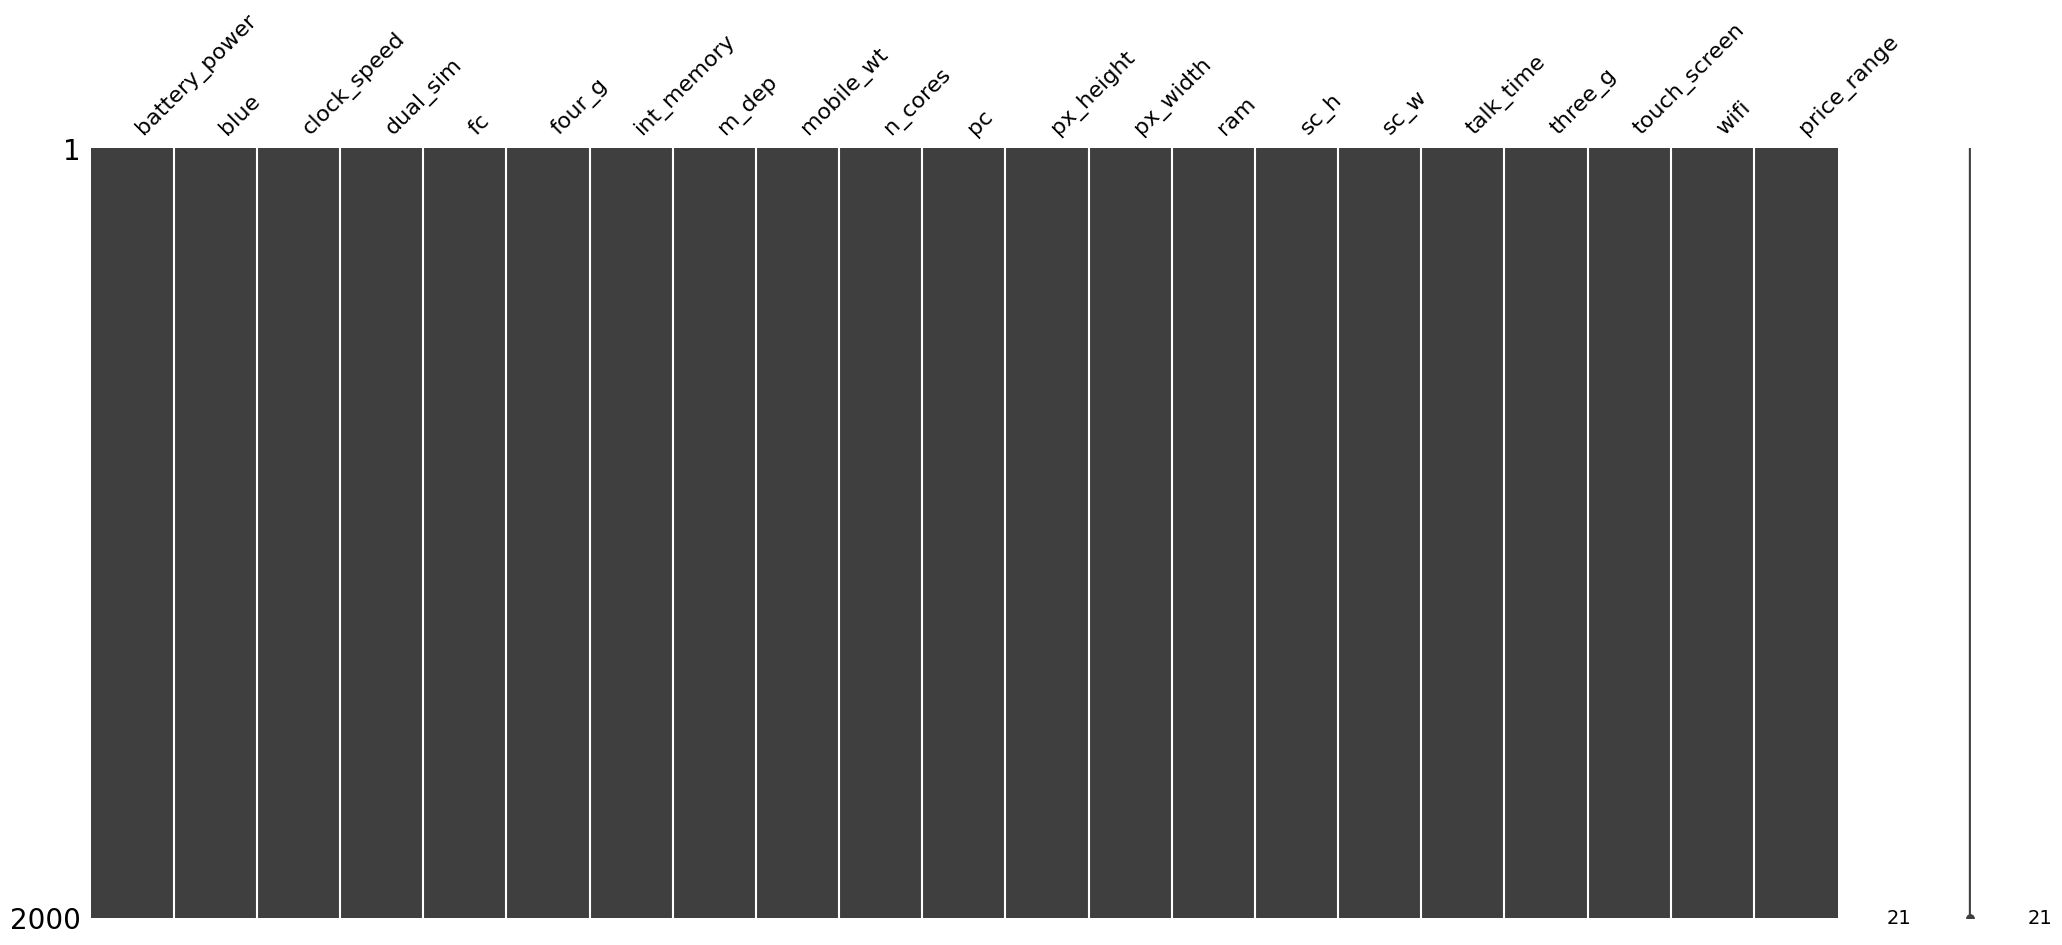

In [41]:
# Visualizing the missing values
import missingno as msno
msno.matrix(dataset)
plt.show()

In [42]:
# Dataset Columns
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [43]:
# Dataset Describe
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [44]:
# Check Unique Values for each variable.
for i in dataset.columns:
  print(f"Unique {i}'s count:{dataset[i].nunique()}\n--------------------------------------------------------------")
  if i in dataset.columns:
    if(dataset[i].nunique() < 25):
      print(f"Unique {i} Values \n{dataset[i].unique()}\n--------------------------------------------------------------")

Unique battery_power's count:1094
--------------------------------------------------------------
Unique blue's count:2
--------------------------------------------------------------
Unique blue Values 
[0 1]
--------------------------------------------------------------
Unique clock_speed's count:26
--------------------------------------------------------------
Unique dual_sim's count:2
--------------------------------------------------------------
Unique dual_sim Values 
[0 1]
--------------------------------------------------------------
Unique fc's count:20
--------------------------------------------------------------
Unique fc Values 
[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
--------------------------------------------------------------
Unique four_g's count:2
--------------------------------------------------------------
Unique four_g Values 
[0 1]
--------------------------------------------------------------
Unique int_memory's count:63
--------------------

In [45]:
# Creating a copy of dataset for data wrangling
df = dataset.copy()

In [46]:
# Checking rows having zero values in pixel height
df[df['px_height']== 0].shape

(2, 21)

In [47]:
# Replacing zero values in pixel height with mean
df['px_height'] = df['px_height'].replace(0,df['px_height'].mean())

In [48]:
# Checking rows having zero values in screen width
df[df['sc_w']== 0].shape

(180, 21)

In [49]:
# Replacing zero values in screen width with mean
df['sc_w'] = df['sc_w'].replace(0,df['sc_w'].mean())

In [50]:
# Checking phones in each price range
price_range = df['price_range'].value_counts().reset_index().rename(columns={'index':'price_range','price_range':'counts'})
price_range

,counts,count
0,1,500
1,2,500
2,3,500
3,0,500


In [51]:
# Checking phones having bluetooth
bluetooth = df.groupby(['price_range','blue'])['blue'].count().unstack()
bluetooth

blue,0,1
price_range,,
0,257,243
1,255,245
2,257,243
3,241,259


In [52]:
# Checking phones having 4G connectivity
four_g_avalibility=df['four_g'].value_counts().reset_index().rename(columns= {'index':'4G','four_g':'counts'})
four_g_avalibility

,counts,count
0,1,1043
1,0,957


In [53]:
# Checking phones having 3G connectivity
three_g_avalibility=df['three_g'].value_counts().reset_index().rename(columns= {'index':'3G','three_g':'counts'})
three_g_avalibility

,counts,count
0,1,1523
1,0,477


In [54]:
# Checking phones having wifi connectivity
wifi = df['wifi'].value_counts().reset_index().rename(columns= {'index':'wifi','wifi':'counts'})
wifi

,counts,count
0,1,1014
1,0,986


In [55]:
# Checking 4G & Wifi connectivity in phones according to price range
wifi_4g=df.groupby(['price_range'])[['four_g','wifi']].sum()
wifi_4g

,four_g,wifi
price_range,,
0,259,248
1,262,252
2,247,252
3,275,262


In [56]:
# Creating new variables 'screen_area' & 'px_area'
df['screen_area'] = df['sc_h'] * df['sc_w']
df['px_area'] = df['px_height'] * df['px_width']

In [57]:
# Average pixel area according to price range
pd.options.display.float_format = '{:.2f}'.format
df.groupby('price_range')['px_area'].mean().reset_index()

,price_range,px_area
0,0,678837.80
1,1,931516.54
2,2,880749.47
3,3,1133782.54


In [58]:
# Checking phones having no front cam according to price range
no_fc = df[df['fc']==0].groupby('price_range')['fc'].count().reset_index()
no_fc

,price_range,fc
0,0,121
1,1,124
2,2,121
3,3,108


In [59]:
# Creating new boolean variables weather phones are having camera or not
df1 = df.copy()
df1['no_fc'] = df1['fc'].apply(lambda x: x if x == 0 else 1)
df1['no_pc'] = df1['pc'].apply(lambda x: x if x == 0 else 1)



In [60]:
# Checking relation between front cam & primary cam
df1.groupby(['no_fc','no_pc'])['no_fc'].count().unstack()

no_pc,0,1
no_fc,,
0,101.00,373.00
1,NaN,1526.00


In [61]:
# Checking relation between 4G & 3G
df.groupby(['three_g','four_g'])['three_g'].count().unstack()

four_g,0,1
three_g,,
0,477.00,NaN
1,480.00,1043.00


In [62]:
# Function for checking relation between price range & other boolean variables
def price_range_and(a):
  return df.groupby(['price_range',a])[a].count().unstack()

In [63]:
# Checking relation between price range & touch screen
price_range_and('touch_screen')

touch_screen,0,1
price_range,,
0,238,262
1,239,261
2,265,235
3,252,248


In [64]:
# Checking relation between price range & wifi
price_range_and('wifi')

wifi,0,1
price_range,,
0,252,248
1,248,252
2,248,252
3,238,262


In [65]:
# Checking relation between price range & 3G
price_range_and('three_g')

three_g,0,1
price_range,,
0,127,373
1,122,378
2,113,387
3,115,385


In [66]:
# Checking relation between price range & 4G
price_range_and('four_g')

four_g,0,1
price_range,,
0,241,259
1,238,262
2,253,247
3,225,275


In [67]:
# Checking relation between range and bluetooth
price_range_and('blue')

blue,0,1
price_range,,
0,257,243
1,255,245
2,257,243
3,241,259


In [68]:
# Checking relation between price range & dual sim
price_range_and('dual_sim')

dual_sim,0,1
price_range,,
0,250,250
1,245,255
2,251,249
3,235,265


In [69]:
# Checking phones having no primary cam according to price range
no_pc = df[df['pc']== 0].groupby('price_range')['pc'].count().reset_index()
no_pc

,price_range,pc
0,0,33
1,1,27
2,2,20
3,3,21


In [70]:
# Checking average Screen Area, Mobile Weight, Battery Power according to price range
features_by_pricerange = df.groupby(['price_range'])[['screen_area','mobile_wt','battery_power']].mean()
features_by_pricerange

,screen_area,mobile_wt,battery_power
price_range,,,
0,84.76,140.55,1116.90
1,82.78,140.51,1228.87
2,82.58,143.61,1228.32
3,92.70,136.32,1379.98


In [71]:
# Creating bins of ram in-range of 1GB to 4GB
df1=df.copy()
df1['rambin'] = pd.cut(df1['ram'],[0,1024,2048,3072,4096])
df1['rambin'].value_counts()

,count
rambin,
"(2048, 3072]",555
"(1024, 2048]",542
"(3072, 4096]",497
"(0, 1024]",406


In [72]:
# Phone distribution in Rambin vs Price range
ram_vs_pr=df1.groupby(['rambin','price_range'])['price_range'].count().unstack()
ram_vs_pr

price_range,0,1,2,3
rambin,,,,
"(0, 1024]",371,35,0,0
"(1024, 2048]",129,347,66,0
"(2048, 3072]",0,118,352,85
"(3072, 4096]",0,0,82,415


# **Data Vizualization**

In [73]:
# creating a function to plot histogram.
def BarPlot(a,height,width):
  fig = x.histogram(df, x=a,color=a,height=height,width=width)
  fig.update_layout(bargap=0.2)
  fig.show()

In [74]:
# creating a function to plot barplots with depandent variable.
def Bivarite_barplot(a,height,width):
  y=df.groupby(['price_range'])[a].mean().reset_index()
  fig = x.bar(y, x='price_range',y=a,title=a +' by price range',color=a, height=height,width=width)
  fig.show()

Chart - 1

In [75]:
# Checking number of phones in different price range
fig = go.Figure(data=[go.Pie(labels=['0','1','2','3'],values= price_range['counts'], hole=.5)])
fig.update_layout(autosize=False,width=700,height=500,title='price range counts',legend_title_text ='price range')
fig.show()

Chart - 2

In [76]:
# Checking phones having bluetooth
BarPlot("blue",height=500,width=600)

Chart - 3

In [77]:
# Checking  phones having dual sim
BarPlot('dual_sim',height=500,width=600)

Chart - 4

In [78]:
# Checking 4G & 3G connectivity in phones

# Create subplots
fig = make_subplots(
   rows=1, cols=2,
   specs=[[{"type": "pie"}, {"type": "pie"}]]
)

# Set traces for the pie chart
fig.add_trace(go.Pie(
   values=four_g_avalibility['counts'],
   labels=['4G Avaliable','4G Not Avaliable'],
   domain=dict(x=[0, 0.5]),
   name="4G Avaliability"),
   row=1, col=1
)

# Traces for the second pie chart
fig.add_trace(go.Pie(
   values=three_g_avalibility['counts'],
   labels=['3G Avaliable','3G Not Avaliable'],
   domain=dict(x=[0.5, 1.0]),
   name="3G Avaliability"),
   row=1, col=2
)
# Plot an image
fig.show()

Chart - 5

In [79]:
# Checking Wifi Connectivity
fig = x.pie(wifi, values='counts', names=['Wifi available','Wifi not available'],title='Wifi Avaliability')
fig.update_layout(autosize=True,width=600,height=600)

Chart - 6

In [80]:
# Checking phones having touch screen feature
BarPlot('touch_screen',height=400,width=500)

Chart - 7

100%|██████████| 10/10 [00:05<00:00,  1.79it/s]


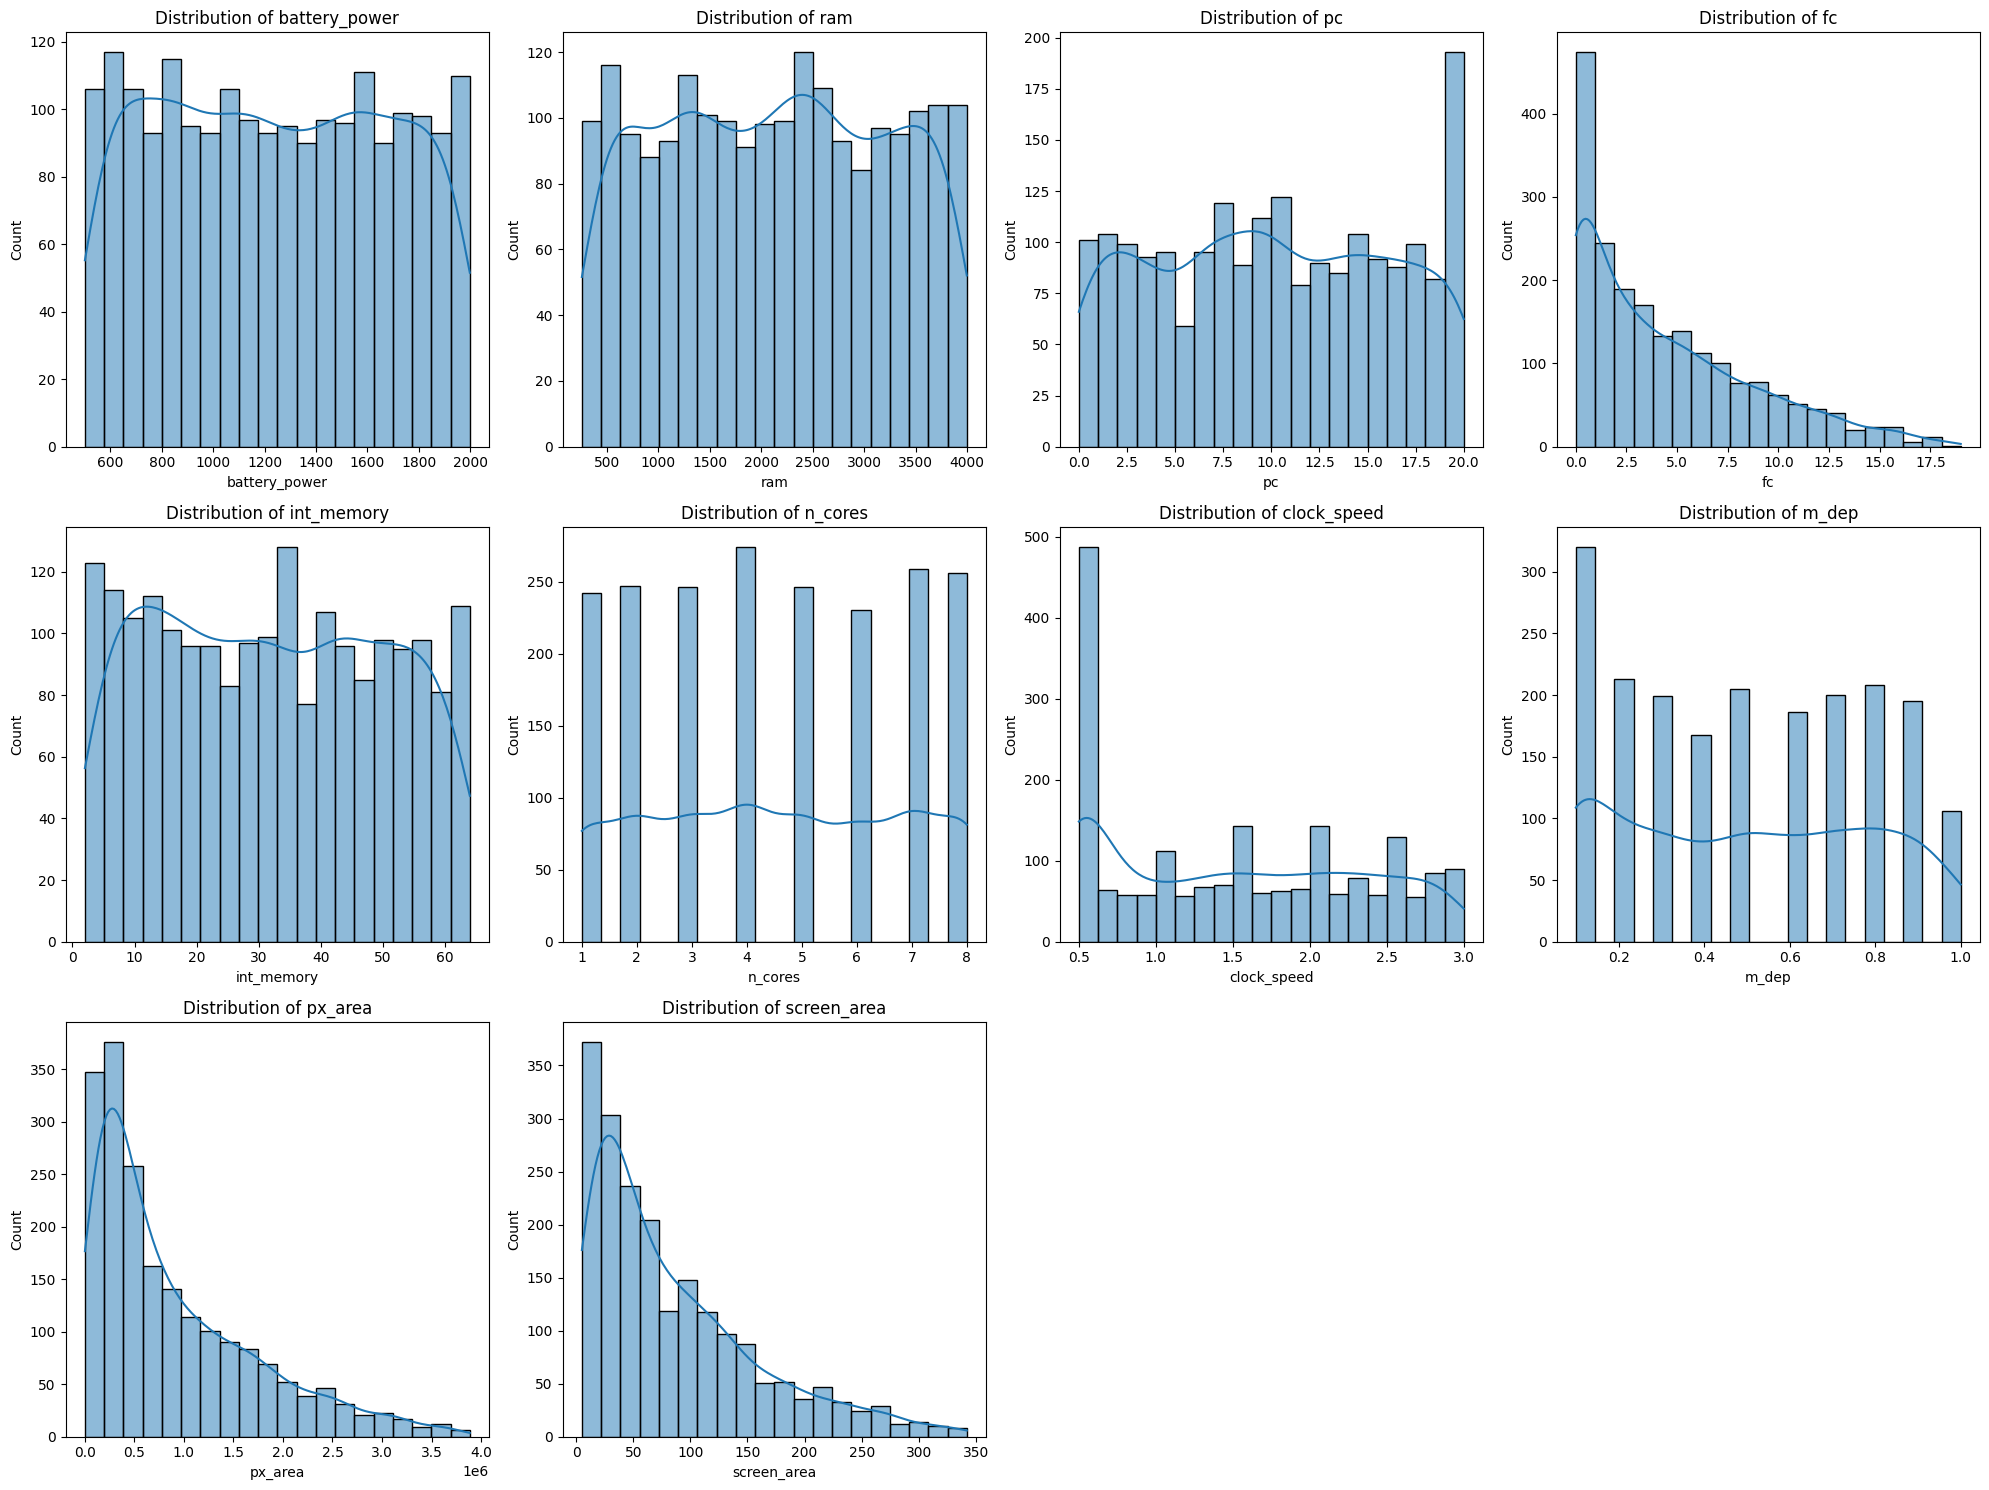

In [81]:
# Visualize the distribution of numerical features
numerical_cols = ['battery_power', 'ram','pc', 'fc', 'int_memory', 'n_cores', 'clock_speed', 'm_dep', 'px_area', 'screen_area']
rows=3
cols=4
counter=1
fig = plt.figure(figsize=(20, 15))
for col in tqdm(numerical_cols):
    plt.subplot(rows,cols,counter)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    counter=counter+1
    plt.tight_layout()

Chart - 8

100%|██████████| 10/10 [00:05<00:00,  1.80it/s]


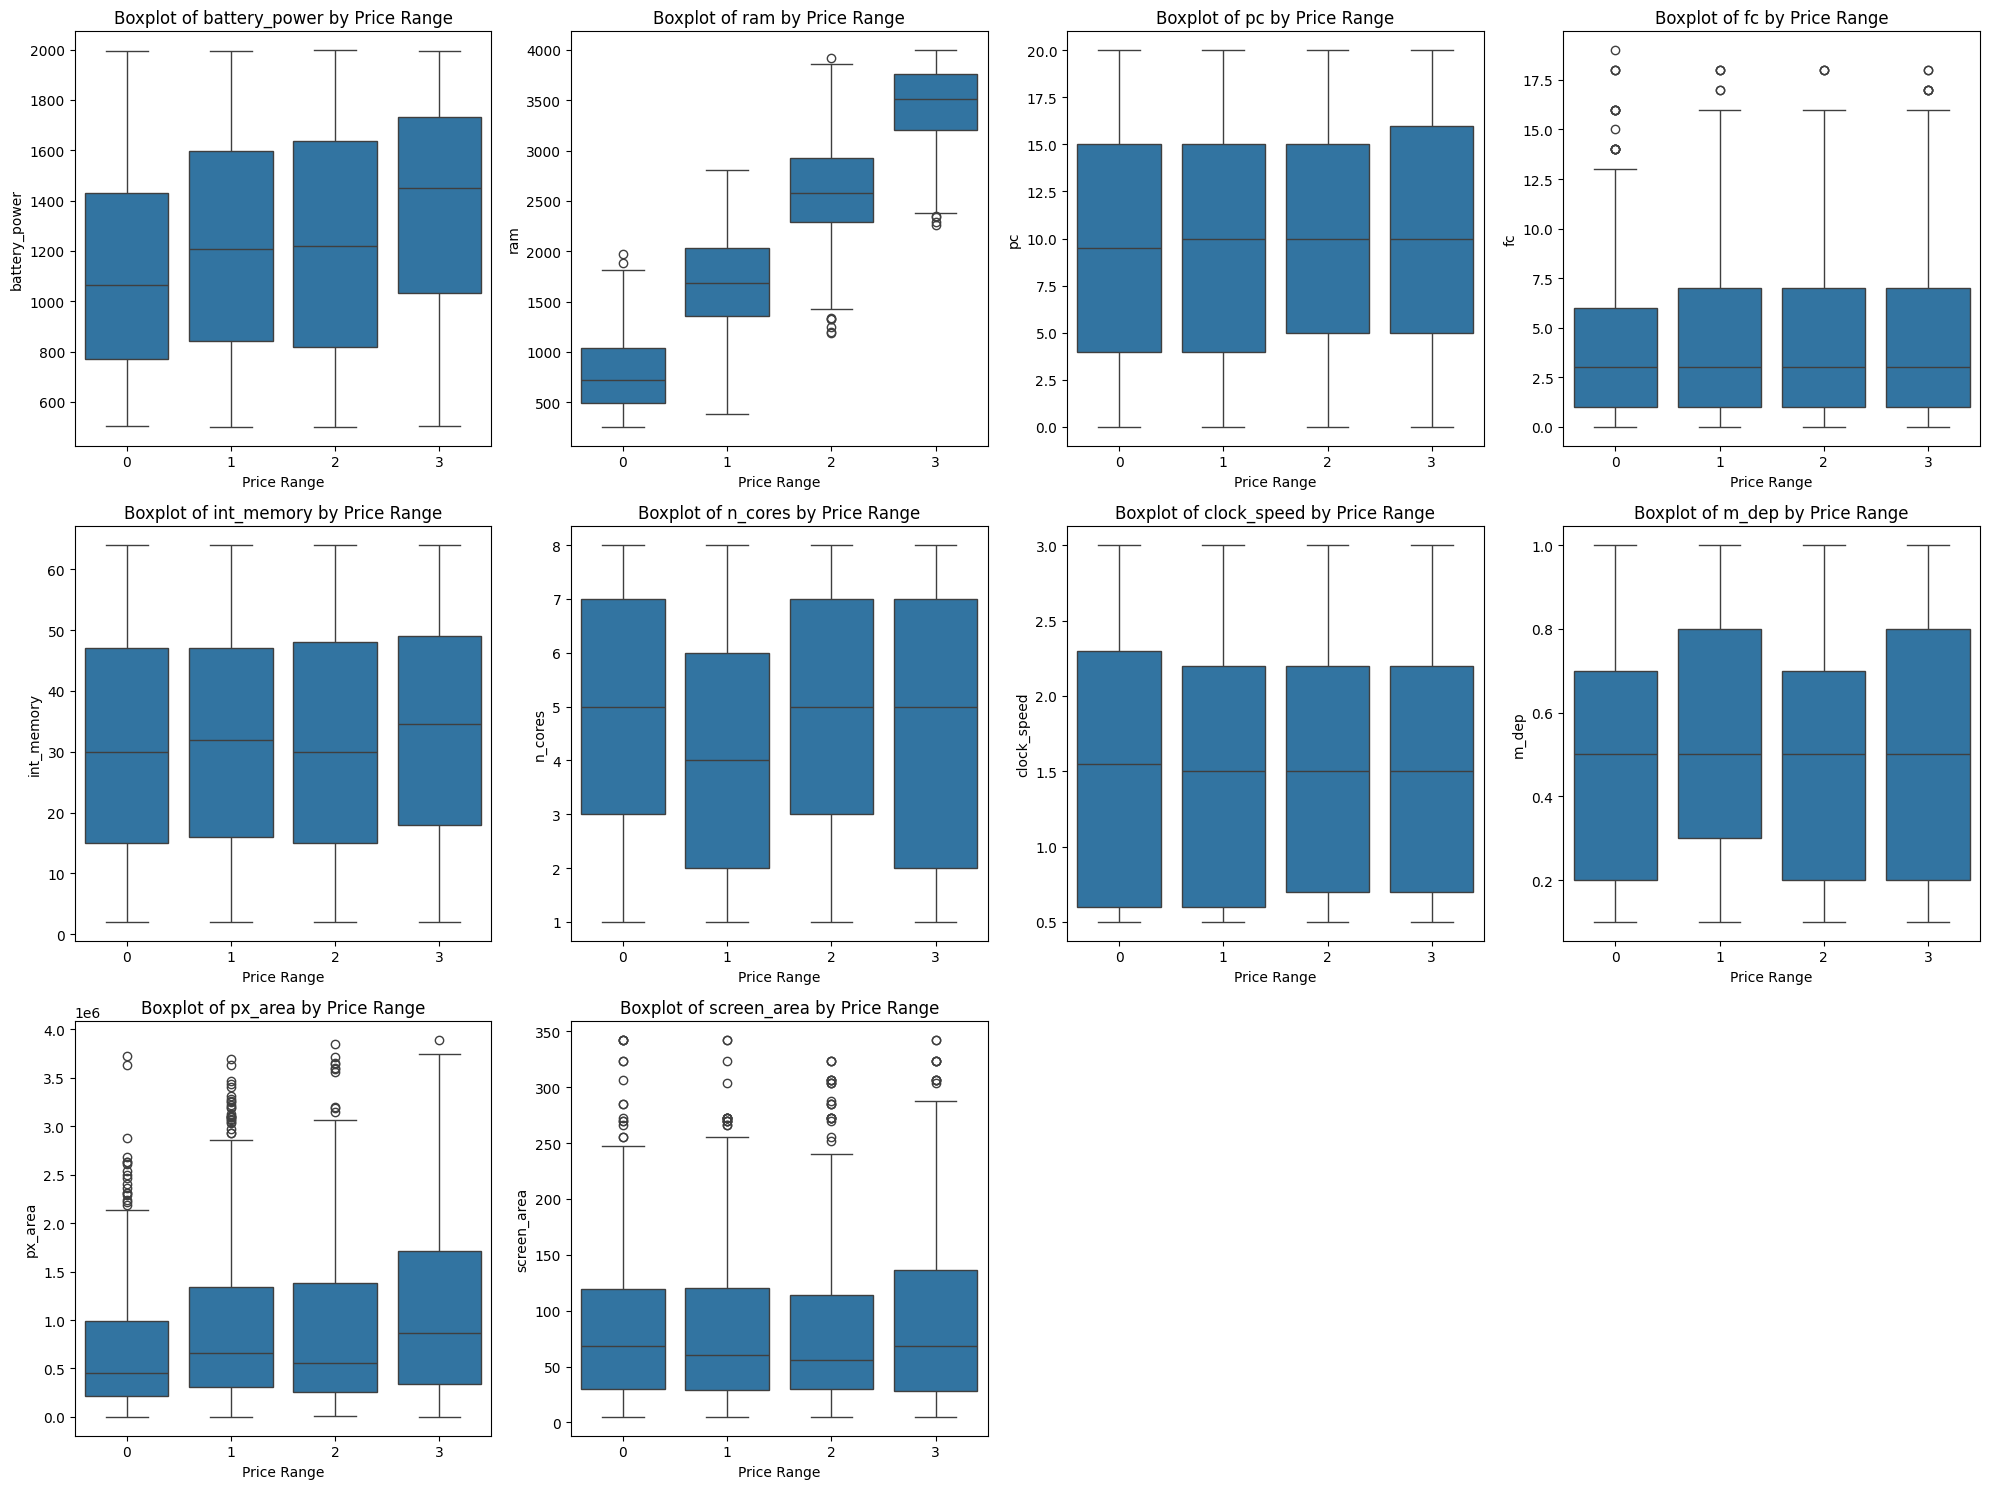

In [82]:
# Visualize the boxplots for numerical features by price range
rows=3
cols=4
counter=1
fig = plt.figure(figsize=(20, 15))
for col in tqdm(numerical_cols):
    plt.subplot(rows,cols,counter)
    sns.boxplot(x='price_range', y=col, data=df)
    plt.title(f'Boxplot of {col} by Price Range')
    plt.xlabel('Price Range')
    plt.ylabel(col)
    counter=counter+1
    plt.tight_layout()

Chart - 9

In [83]:
# Checking relation between pixel area, screen area with price range.
Bivarite_barplot('px_area',height=500,width=600)
Bivarite_barplot('screen_area',height=500,width=600)

Chart - 10

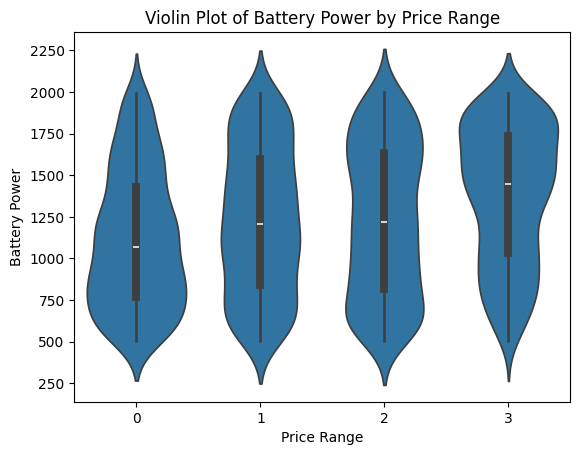

In [84]:
# Create Violin Plots of Battery Power by Price Range
sns.violinplot(x='price_range', y='battery_power', data=df)
plt.title('Violin Plot of Battery Power by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.show()

Chart - 11

In [85]:
# Checking ram distribution on the basis of price range.
fig = go.Figure(data=[
    go.Bar(name = 'Price Range 0', x=['[0, 1024]', '[1024, 2048]', '[2048, 3072]', '[3072, 4096]'],y=ram_vs_pr.iloc[0]),
    go.Bar(name = 'Price Range 1', x=['[0, 1024]', '[1024, 2048]', '[2048, 3072]', '[3072, 4096]'],y=ram_vs_pr.iloc[1]),
    go.Bar(name = 'Price Range 2', x=['[0, 1024]', '[1024, 2048]', '[2048, 3072]', '[3072, 4096]'],y=ram_vs_pr.iloc[2]),
    go.Bar(name = 'Price Range 3', x=['[0, 1024]', '[1024, 2048]', '[2048, 3072]', '[3072, 4096]'],y=ram_vs_pr.iloc[3])])

fig.update_layout(width=900,height=500,barmode='group',title = 'Phones in Ram groups')
fig.show()

Chart -12

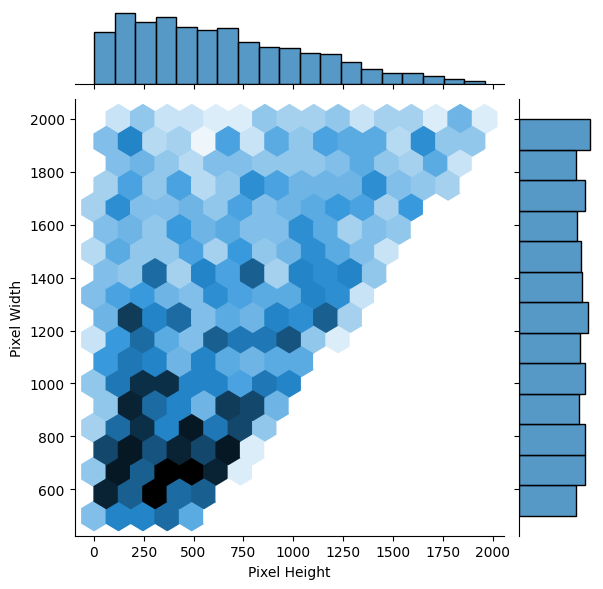

In [86]:
# Ploting Hexbin Plot of Pixel Height vs. Pixel Width.
sns.jointplot(x='px_height', y='px_width', data=df, kind='hex')
plt.xlabel('Pixel Height')
plt.ylabel('Pixel Width')
plt.show()

Chart - 13

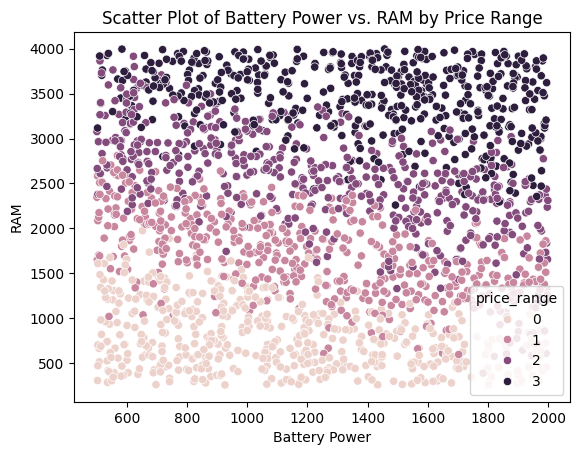

In [87]:
# checking relation between ram, battery power and price range.
sns.scatterplot(x='battery_power', y='ram', hue='price_range', data=df)
plt.title('Scatter Plot of Battery Power vs. RAM by Price Range')
plt.xlabel('Battery Power')
plt.ylabel('RAM')
plt.show()

Chart - 14

In [88]:
# Showing the phones with no front and primary cam on the basis of price range.
fig = go.Figure(data=[
    go.Bar(name = 'No Frontcam', x=[0,1,2,3],y=no_fc['fc']),
    go.Bar(name = 'No Primarycam', x=[0,1,2,3],y=no_pc['pc'])])

fig.update_layout(width=900,height=500,barmode='group',title = 'Phones with no camera according to price range')
fig.show()

Chart - 15 - Correlation Heatmap

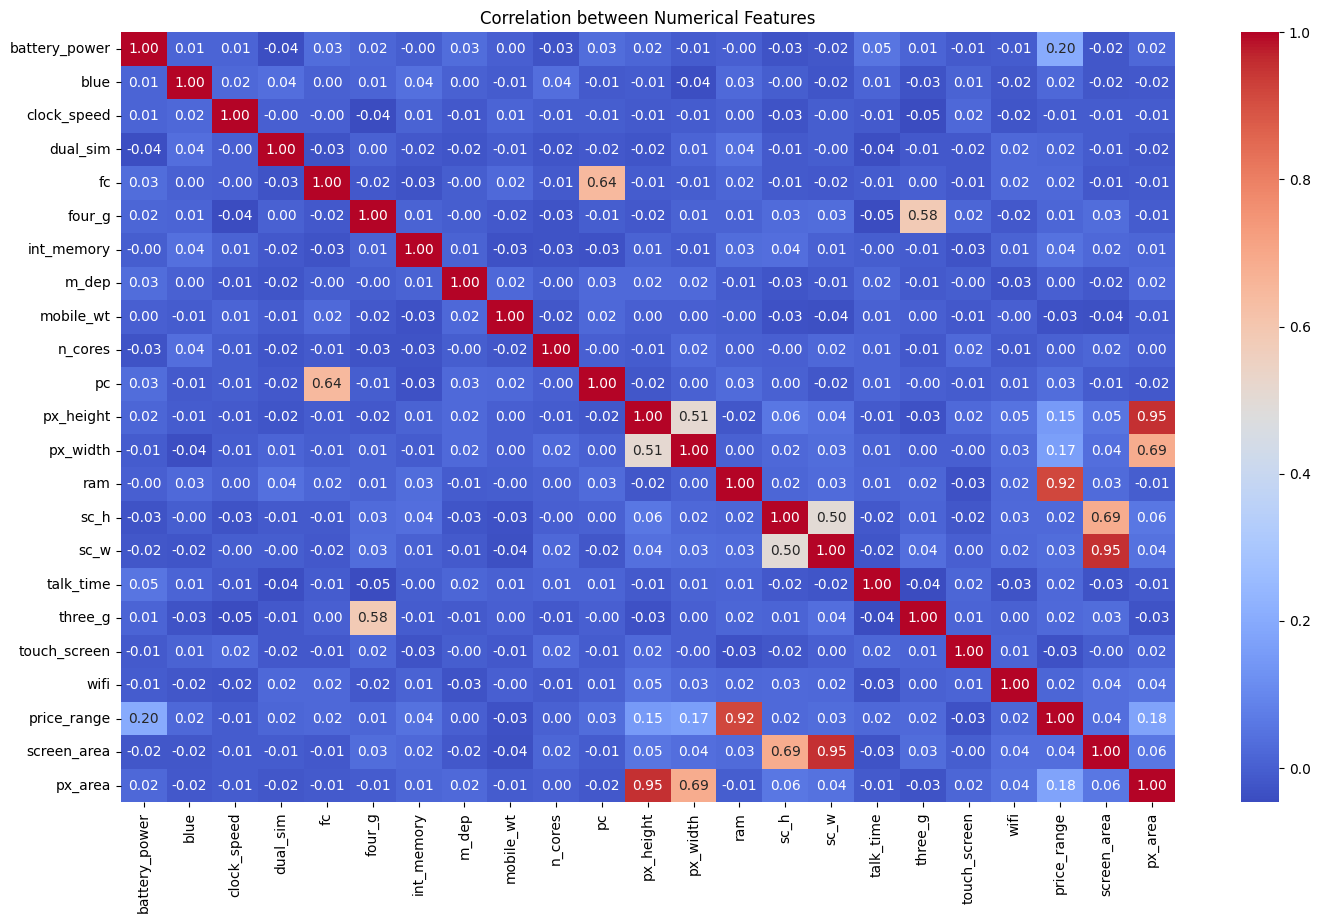

In [89]:
# Correlation Heatmap visualization code
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Numerical Features')
plt.show()

Chart - 16 - Pair plot

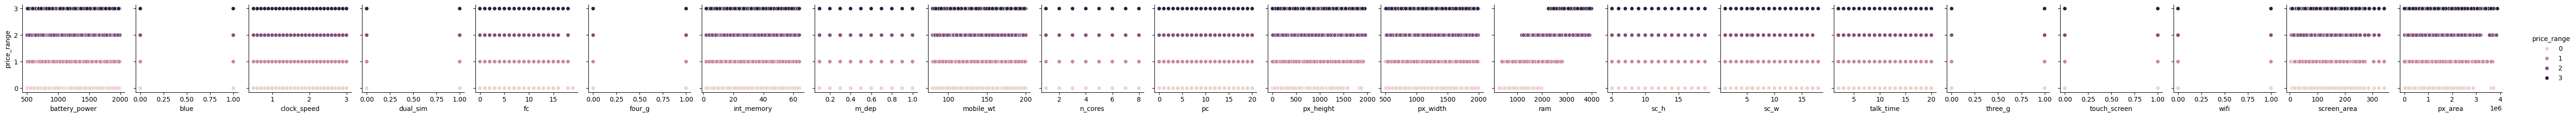

In [90]:
# Pair Plot visualization code
numeric_col = ['battery_power', 'clock_speed', 'fc','int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
               'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
sns.pairplot(df, hue='price_range',y_vars = 'price_range')
plt.show()

# **Hypothesis Testing**

In [91]:
# Creating separate variable for ram based on lower & higher price range

low_range_phones_ram = df[df['price_range'] == 0]['ram']
high_range_phones_ram = df[df['price_range'] == 3]['ram']

# Two sample t-test
result,p_value = stats.ttest_ind(a=low_range_phones_ram, b=high_range_phones_ram,equal_var=True)

# #95% Confidence interval
if p_value < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')

We are rejecting null hypothesis


In [92]:
# Creating separate variable for internal memory based on lower & higher price range

low_range_phones_mem = df[df['price_range'] == 0]['int_memory']
high_range_phones_mem = df[df['price_range'] == 3]['int_memory']

# Perform the two sample t-test
result,p_value = stats.ttest_ind(a=low_range_phones_mem, b=high_range_phones_mem, equal_var=True)

#95% Confidence interval
if p_value < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')


We are rejecting null hypothesis


In [93]:
# Create contingency table of price range and 4G connectivity
chi_table = pd.crosstab(df['price_range'], df['four_g'])

# Perform chi-square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(chi_table)

#95% Confidence interval
if p_val < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')

We are accepting null hypothesis


In [94]:
# Perform Statistical Test to obtain P-Value

low_range_phones = df[df['price_range'] == 0]
high_range_phones = df[df['price_range'] == 3]

# Performing non parametric mannwhitney test
stats, p_val=mannwhitneyu(low_range_phones.screen_area,high_range_phones.price_range)

#95% Confidence interval
if p_val < 0.05:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')

We are rejecting null hypothesis


# **Feature Engineering & Data Pre-processing**

In [95]:
# Handling Missing Values & Missing Value Imputation

'''There are no missing values present in the dataset.'''

'There are no missing values present in the dataset.'

In [96]:
# Handling Outliers & Outlier treatments

'''There are very few outliers present in the dataset which can be ignored as dataset id very small.'''

'There are very few outliers present in the dataset which can be ignored as dataset id very small.'

In [97]:
# Encode your categorical columns

'''Not Required'''

'Not Required'

In [98]:
# Manipulate Features to minimize feature correlation and create new features
df.drop(['sc_h', 'sc_w','px_height','px_width'],axis=1,inplace = True)

In [99]:
#Finding P and F-values of all the avaliable variables
from sklearn.feature_selection import SelectKBest,f_classif
df_copy = df.copy()
y=df_copy.pop('price_range')
X = df_copy
#for selecting 5 best features from dataset
feature_selector = SelectKBest(f_classif,k=10)
fit=feature_selector.fit(X,y)

In [100]:

# Perform Statistical Test to obtain P-Value

#Storing results in dataframe
p_values=pd.DataFrame(fit.pvalues_)
f_score=pd.DataFrame(fit.scores_)
input_variable_names=pd.DataFrame(X.columns)

#Concating two dataframe
summary_stats=pd.concat([input_variable_names,p_values,f_score],axis=1)
summary_stats.columns=['input_variable','p_value','f_score']

#Selecting values based on 90% confidence interval.
selected_variable=summary_stats.loc[(summary_stats['p_value']<=0.1)]
selected_variable.sort_values(by='f_score',ascending = True,inplace=True)
selected_variable

,input_variable,p_value,f_score
16,screen_area,0.10,2.12
9,n_cores,0.05,2.63
6,int_memory,0.03,2.92
8,mobile_wt,0.01,3.59
17,px_area,0.00,26.36
0,battery_power,0.00,31.60
11,ram,0.00,3520.11


In [101]:
# summary_stats.sort_values(by='p_value',ascending = False)

In [102]:
# Selecting independent variables based on p-value
X = df[selected_variable.input_variable]
y = df['price_range']

In [103]:
X.head()

,screen_area,n_cores,int_memory,mobile_wt,px_area,battery_power,ram
0,63.00,2,7,188,15120.00,842,2549
1,51.00,3,53,136,1799140.00,1021,2631
2,22.00,5,41,145,2167308.00,563,2603
3,128.00,6,10,131,2171776.00,615,2769
4,16.00,2,44,141,1464096.00,1821,1411


100%|██████████| 7/7 [00:01<00:00,  6.56it/s]


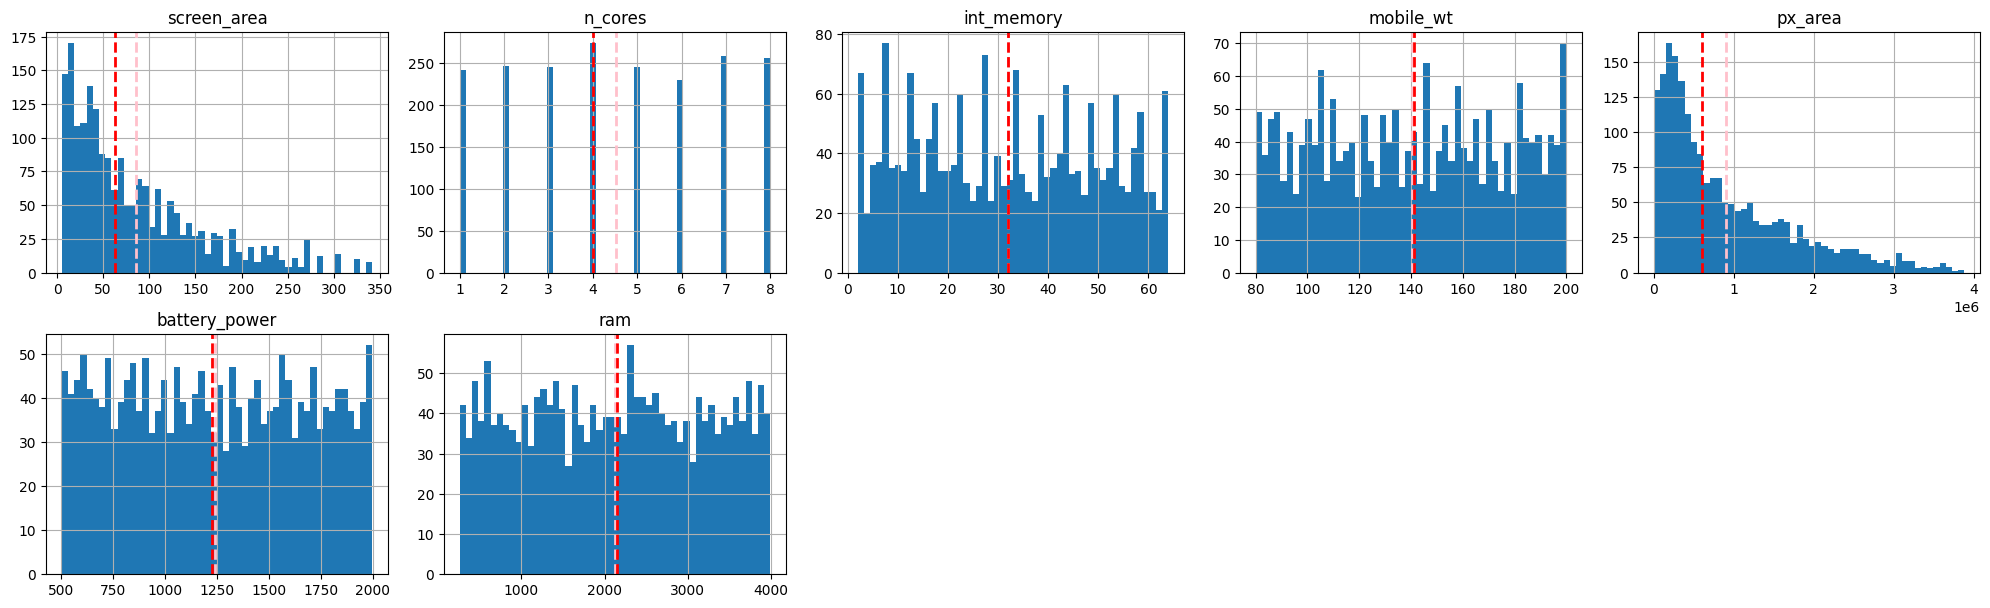

In [104]:
# Transform Your data

rows=5
cols=5
counter=1
fig = plt.figure(figsize=(20,15))
for col in tqdm(X.columns):
  plt.subplot(rows,cols,counter)
  ax = fig.gca()
  X[col].hist(bins=50, ax = ax)
  ax.axvline(X[col].mean(), color = 'pink',linestyle='dashed', linewidth=2)
  ax.axvline(X[col].median(), color = 'red',linestyle='dashed', linewidth=2)
  ax.set_title(col)
  counter=counter+1
  plt.tight_layout()

In [105]:
# Transform Your data
from sklearn import preprocessing
pt=preprocessing.PowerTransformer(copy=False)
# X[['fc','screen_area','px_area']]=pt.fit_transform(X[['fc','screen_area','px_area']])
X[['screen_area','px_area']]=pt.fit_transform(X[['screen_area','px_area']])

100%|██████████| 2/2 [00:00<00:00, 11.35it/s]


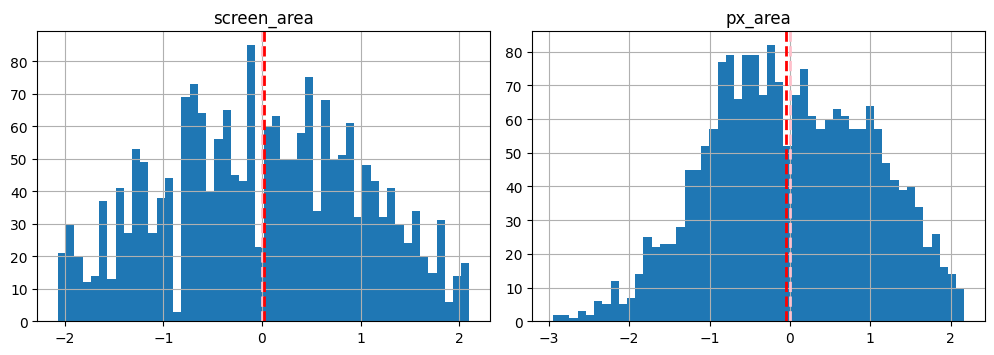

In [106]:
# Transform Your data
rows=3
cols=3
counter=1
fig = plt.figure(figsize=(15,10))
# for col in ['fc','screen_area','px_area']:
for col in tqdm(['screen_area','px_area']):
  plt.subplot(rows,cols,counter)
  ax = fig.gca()
  X[col].hist(bins=50, ax = ax)
  ax.axvline(X[col].mean(), color = 'pink',linestyle='dashed', linewidth=2)
  ax.axvline(X[col].median(), color = 'red',linestyle='dashed', linewidth=2)
  ax.set_title(col)
  counter=counter+1
  plt.tight_layout()

In [107]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

#Creating object
scaler = StandardScaler()

#Fit on data
X_scaled=scaler.fit_transform(X)

In [108]:
#converting to dataframe
X_scaled_df=pd.DataFrame(data=X_scaled,columns=X.columns,index=X.index)

In [109]:
# DImensionality Reduction (If needed)
'''Already done in feature selection part'''

'Already done in feature selection part'

In [110]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_scaled_df,y , test_size = 0.2, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 7)
(400, 7)
(1600,)
(400,)


In [111]:
# Handling Imbalanced Dataset (If needed)
'''Dataset is already balanced'''

'Dataset is already balanced'

# **ML Model Implementation**

**Ml Model - 1**

In [112]:
# from flaml import AutoML

# # Initialize an AutoML instance
# automl = AutoML()

# # Specify automl goal and constraint
# automl_settings = {
#     "time_budget": 800,  # in seconds
#     "metric": 'accuracy',
#     "task": 'classification',
#     "log_file_name": "credit_default.log",
# }

# # Train with labeled input data
# automl.fit(X_train=X_train, y_train=y_train,
#            **automl_settings)

'''Best model retained is : LogisticRegression(C=0.5110498669537961, n_jobs=-1, penalty='l1', solver='saga')'''

"Best model retained is : LogisticRegression(C=0.5110498669537961, n_jobs=-1, penalty='l1', solver='saga')"

In [113]:
#Saving automl model
automl_model = LogisticRegression(C=0.5110498669537961, n_jobs=-1, penalty='l1', solver='saga')

In [114]:
# ML Model - 1 Implementation

#Create function to fit and score models
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
def fit_and_score(model,X_train,X_test,y_train,y_test):
  # Dictionary to keep model scores
  models_trained={}
  clf_report={}

  # Fit the Algorithm
  for name, model in model.items():
    #Fit the model to the data
    model=model.fit(X_train,y_train)
    models_trained[name]=model


  #Predicting with tuned model
  y_preds=model.predict(X_test)

  #creating classification report
  clf_report[name]=classification_report(y_test,y_preds)

  #Dictionary for storing scores
  model_scores={'Accuracy':model.score(X_test,y_test),'Precision':precision_score(y_test,y_preds,average='weighted'),
                'Recall':recall_score(y_test,y_preds,average='weighted'),'F1 score': f1_score(y_test,y_preds,average='weighted')}

  model_score_df=pd.DataFrame([model_scores]).rename(index={0:f'{name}'})


  return models_trained,model_score_df,clf_report

In [115]:
#Function to plot confusion matrix of the model results
def conf_matrix(model,X_train,X_test,y_train,y_test):
  for ind,key in enumerate(model.keys()):
    y_score = model[key].predict(X_test)
    ConfMatrix = confusion_matrix(y_test,y_score)
    sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", xticklabels = ['Low','Medium', 'High','Very High'], yticklabels = ['Low','Medium', 'High','Very High'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(f"Confusion Matrix - {key}")

In [116]:
#Creating instance of logistic regression and storing it in dictionary
model={'Logistic Regression':LogisticRegression()}

#calling function and creating classification report
model_lr,lr_score,lr_report=fit_and_score(model=model,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [117]:
#storing model score
lr_score

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.94,0.95,0.94,0.94


In [118]:
# Visualizing evaluation Metric Score chart

#Classification report of logistic regression
print(lr_report['Logistic Regression'])

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.92      0.93      0.93        92
           2       0.91      0.90      0.90        99
           3       0.96      0.96      0.96       114

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.95      0.94      0.94       400



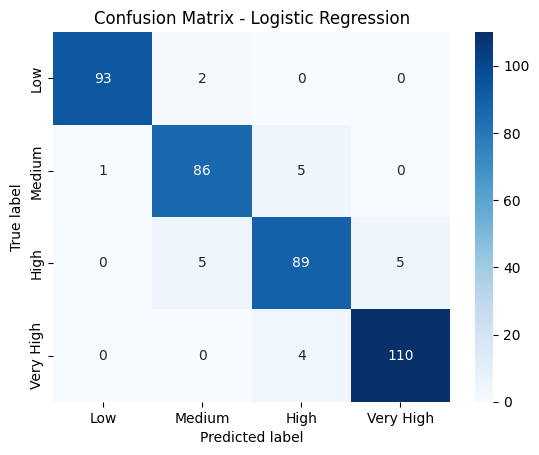

In [119]:
#Confusion Matrix for logistic regression
conf_matrix(model=model,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [120]:
#Hyperparameter tuning using grid search and randomized search cv.

def Hyper_parameter_tuning(grid_search,random_search,model_name,parameter_grid,X_train,X_test,y_train,y_test):

  # Fit the Algorithm
  for name, model in model_name.items():
    #creating regression model
    clf_model=model

  if(grid_search):
    #Tuning parameters using grid search
    grid_search=GridSearchCV(clf_model,param_grid=parameter_grid,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

    #fitting model
    model_fit=grid_search.fit(X_train, y_train)

    #Predicting
    y_pred = grid_search.predict(X_test)

    #creating classification report
    clf_report=classification_report(y_test,y_pred)

    #Dictionary for storing scores
    model_scores={'Accuracy':grid_search.best_score_,'Precision':precision_score(y_test,y_pred,average='weighted'),
                'Recall':recall_score(y_test,y_pred,average='weighted'),'F1 score': f1_score(y_test,y_pred,average='weighted')}


    #Storing best parameters in dataframe
    scores={'best_parameter':grid_search.best_params_,f'{name} Accuracy': grid_search.best_score_}
    df = pd.DataFrame.from_dict(scores),model_fit

    return df,model_fit,clf_report,pd.DataFrame([model_scores]).rename(index={0:f'Tuned {name}'})

  elif(random_search):
    #Tuning parameters using randomized search cv
    randomized_search=RandomizedSearchCV(clf_model,param_distributions=parameter_grid,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

    #fitting model
    model_fit=randomized_search.fit(X_train, y_train)

    #Predicting
    y_pred = randomized_search.predict(X_test)

    #creating classification report
    clf_report=classification_report(y_test,y_pred)



    #Storing best parameters in dataframe
    scores={'best_parameter':randomized_search.best_params_,f'{name} Accuracy': randomized_search.best_score_}
    df = pd.DataFrame.from_dict(scores),model_fit

    #Dictionary for storing scores
    model_scores={'Accuracy':randomized_search.best_score_,'Precision':precision_score(y_test,y_pred,average='weighted'),
                'Recall':recall_score(y_test,y_pred,average='weighted'),'F1 score': f1_score(y_test,y_pred,average='weighted')}

    return df,model_fit,clf_report,pd.DataFrame([model_scores]).rename(index={0:f'Tuned {name}'})


In [121]:
#Hyper parameter for logistic regression using grid search cv

#parameter grid for logistic regression
log_reg_grid={'C':np.logspace(-8,8,30),
              'solver':['newton-cg','lbfgs','liblinear'],
              'penalty':['l1','l2','elasticnet'],
              'max_iter':[50,75,100],
              }
#Hyperparameter tuning using grid search cv
best_parameters_lr,model_lr_tuned,clf_report_lr,tuned_lr_scores=Hyper_parameter_tuning(grid_search=True,random_search=False,
                                                                       model_name=model,
                                                                       parameter_grid=log_reg_grid,
                                                                       X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits


In [122]:
#Tuned model score
tuned_lr_scores

,Accuracy,Precision,Recall,F1 score
Tuned Logistic Regression,0.94,0.95,0.95,0.95


In [123]:
#Storing tuned model score in dataframe
model_scores=pd.concat([lr_score, tuned_lr_scores], axis=0,join='inner')
model_scores

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.94,0.95,0.94,0.94
Tuned Logistic Regression,0.94,0.95,0.95,0.95


In [124]:
#best parameters for logistic regression
best_parameters_lr[0]

,best_parameter,Logistic Regression Accuracy
C,85.32,0.94
max_iter,50,0.94
penalty,l2,0.94
solver,newton-cg,0.94


In [125]:
#Printing classification report of tuned model.
print(clf_report_lr)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.93      0.96      0.94        92
           2       0.93      0.89      0.91        99
           3       0.95      0.96      0.96       114

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



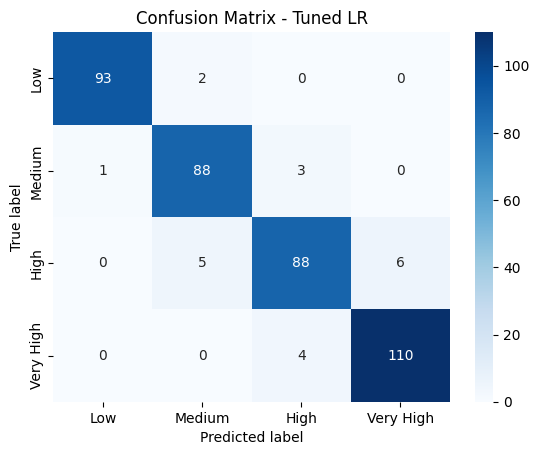

In [126]:
#Confusion matrix of tuned model
conf_matrix(model={'Tuned LR': model_lr_tuned},X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [127]:
#Creating model using parameters provided by automl
lr_automl={'Auto ML Logistic Regression':automl_model}
automl_lr,lr_auto_score,lr_report=fit_and_score(model=lr_automl,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [128]:
#Storing Score of automl model
model_scores=pd.concat([model_scores, lr_auto_score], axis=0,join='inner')
model_scores

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.94,0.95,0.94,0.94
Tuned Logistic Regression,0.94,0.95,0.95,0.95
Auto ML Logistic Regression,0.95,0.95,0.95,0.95


In [129]:
# #Classification Report for logistic regression
print(lr_report['Auto ML Logistic Regression'])

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.94      0.95      0.94        92
           2       0.93      0.90      0.91        99
           3       0.95      0.97      0.96       114

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [130]:
# Checking Important Features
imp_features = lr_automl['Auto ML Logistic Regression'].coef_
imp_features = pd.DataFrame(imp_features,columns = X_train.columns,index =['Low','Medium','High','Very_High']).T
imp_features['Mean'] = (abs(imp_features['Low'])+abs(imp_features['Medium'])+abs(imp_features['High'])+abs(imp_features['Very_High']))/4
imp_features.sort_values(by=['Mean'],ascending=False,inplace = True)
imp_features

,Low,Medium,High,Very_High,Mean
ram,-17.44,-4.92,4.84,17.52,11.18
battery_power,-4.31,-1.26,1.24,4.33,2.79
px_area,-4.08,-1.18,1.11,4.18,2.64
mobile_wt,0.55,0.19,-0.12,-0.81,0.42
int_memory,-0.13,0.00,0.00,0.47,0.15
n_cores,0.00,-0.16,0.00,0.04,0.05
screen_area,0.01,-0.09,-0.02,0.06,0.05


**ML Model - 2**

In [131]:
# Applying KNN Model
model_knn={'KNN':KNeighborsClassifier()}
model_knn,knn_score,knn_report=fit_and_score(model=model_knn,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [132]:
#Storing model scores
model_scores=pd.concat([model_scores, knn_score], axis=0,join='inner')
model_scores

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.94,0.95,0.94,0.94
Tuned Logistic Regression,0.94,0.95,0.95,0.95
Auto ML Logistic Regression,0.95,0.95,0.95,0.95
KNN,0.77,0.78,0.77,0.77


In [133]:
# Visualizing evaluation Metric Score chart

#Classification report for knn
print(knn_report['KNN'])

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        95
           1       0.66      0.67      0.67        92
           2       0.69      0.71      0.70        99
           3       0.90      0.82      0.86       114

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.78      0.77      0.77       400



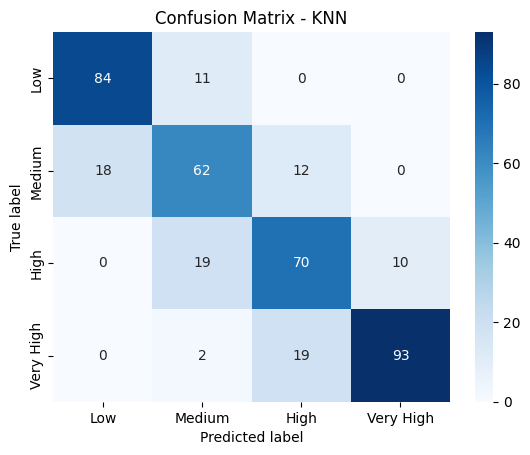

In [134]:
#Confusion Matrix for knn
conf_matrix(model=model_knn,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [135]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

train_scores=[]
test_scores=[]

#Create a list of different values for n_neighbors
neighbors=range(1,35)

#Setup knn instance
knn=model_knn['KNN']

#Loop through different n_neighbors
for i in neighbors:
  knn.set_params(n_neighbors=i)

  #Fit the algorithm
  knn.fit(X_train,y_train)

  #Update the training score list
  train_scores.append(knn.score(X_train,y_train))

  #Update test score list
  test_scores.append(knn.score(X_test,y_test))

Maximum KNN score on the test data : 77.75%


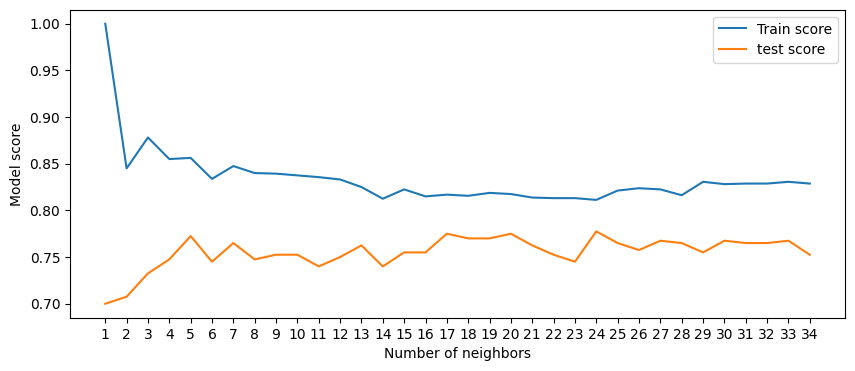

In [136]:
#Lineplot of test score and train score for different value of neighbours
plt.figure(figsize=(10, 4))
plt.plot(neighbors,train_scores,label='Train score')
plt.plot(neighbors,test_scores,label='test score')
plt.xticks(np.arange(1,35,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()
print(f"Maximum KNN score on the test data : {max(test_scores)*100:.2f}%")

In [137]:
 #Implementing tuned model
model=knn.set_params(n_neighbors=24)
tuned_knn=model.fit(X_train,y_train)

#Predicting with tuned model
y_preds=model.predict(X_test)

#Dictionary for storing scores
model_scores_knn={'Accuracy':model.score(X_test,y_test),'Precision':precision_score(y_test,y_preds,average='weighted'),
                'Recall':recall_score(y_test,y_preds,average='weighted'),'F1 score': f1_score(y_test,y_preds,average='weighted')}

#converting dictionary to dataframe
model_score_df=pd.DataFrame([model_scores_knn]).rename(index={0:'Tuned KNN'})

In [138]:
model_scores

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.94,0.95,0.94,0.94
Tuned Logistic Regression,0.94,0.95,0.95,0.95
Auto ML Logistic Regression,0.95,0.95,0.95,0.95
KNN,0.77,0.78,0.77,0.77


In [139]:
#Storing model scores
model_scores=pd.concat([model_scores, model_score_df], axis=0,join='inner')
model_scores

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.94,0.95,0.94,0.94
Tuned Logistic Regression,0.94,0.95,0.95,0.95
Auto ML Logistic Regression,0.95,0.95,0.95,0.95
KNN,0.77,0.78,0.77,0.77
Tuned KNN,0.78,0.79,0.78,0.78


**ML Model - 3**

In [140]:
# ML Model - 3 Implementation

#creating instance of model and storing it in dictionary
model_rf={'Random Forest':RandomForestClassifier()}

#Implementing random forest and creating classification report
model_rf,rf_score,rf_report=fit_and_score(model=model_rf,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [141]:
#Storing model scores
model_scores=pd.concat([model_scores, rf_score], axis=0,join='inner')
model_scores

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.94,0.95,0.94,0.94
Tuned Logistic Regression,0.94,0.95,0.95,0.95
Auto ML Logistic Regression,0.95,0.95,0.95,0.95
KNN,0.77,0.78,0.77,0.77
Tuned KNN,0.78,0.79,0.78,0.78
Random Forest,0.90,0.90,0.90,0.90


In [142]:
# Visualizing evaluation Metric Score chart

#Classification report for random forest
print(rf_report['Random Forest'])

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        95
           1       0.91      0.85      0.88        92
           2       0.83      0.83      0.83        99
           3       0.91      0.93      0.92       114

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



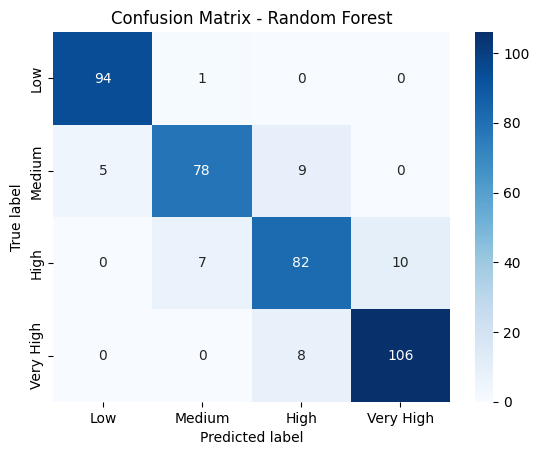

In [143]:
#Confusion matrix for random forest classifier
conf_matrix(model=model_rf,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [144]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#Parameter grid for random forest
rf_grid = {
    'n_estimators': [250,300,400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,12,14],
    'criterion' :['gini', 'entropy','log_loss'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

#hyperparamter tuning using randomized search cv
best_parameters_rf,model_rf_tuned,clf_report_rf,tuned_rf_scores=Hyper_parameter_tuning(grid_search=False,random_search=True,
                                                                       model_name=model_rf,
                                                                       parameter_grid=rf_grid,X_train=X_train,X_test=X_test,
                                          y_train=y_train,y_test=y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [145]:
#Storing model scores
model_scores=pd.concat([model_scores, tuned_rf_scores], axis=0,join='inner')
model_scores

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.94,0.95,0.94,0.94
Tuned Logistic Regression,0.94,0.95,0.95,0.95
Auto ML Logistic Regression,0.95,0.95,0.95,0.95
KNN,0.77,0.78,0.77,0.77
Tuned KNN,0.78,0.79,0.78,0.78
Random Forest,0.90,0.90,0.90,0.90
Tuned Random Forest,0.89,0.89,0.90,0.89


In [146]:
#Best parameters for random forest
best_parameters_rf[0]

,best_parameter,Random Forest Accuracy
n_estimators,250,0.89
min_samples_split,5,0.89
min_samples_leaf,2,0.89
max_features,log2,0.89
max_depth,14,0.89
criterion,log_loss,0.89


In [147]:
#Printing classification report of random forest classifier
print(clf_report_rf)


              precision    recall  f1-score   support

           0       0.96      0.98      0.97        95
           1       0.87      0.86      0.86        92
           2       0.82      0.82      0.82        99
           3       0.93      0.92      0.93       114

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.90      0.89       400



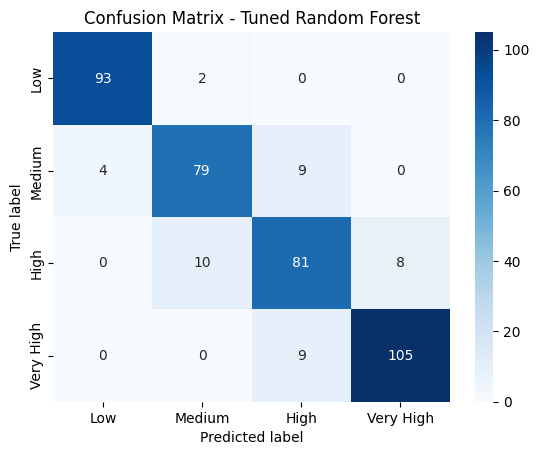

In [148]:
#Confusion matrix of tuned model
conf_matrix(model={'Tuned Random Forest': model_rf_tuned},X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

**ML Model - 4**

In [149]:
# ML Model - 4 Implementation

#creating instance of model storing it in dictionary
model_xgb={'XGB':XGBClassifier()}

#fiting the model creating classification report
model_xgb,xgb_score,xgb_report=fit_and_score(model=model_xgb,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [150]:
#Storing model scores
model_scores=pd.concat([model_scores, xgb_score], axis=0,join='inner')
model_scores

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.94,0.95,0.94,0.94
Tuned Logistic Regression,0.94,0.95,0.95,0.95
Auto ML Logistic Regression,0.95,0.95,0.95,0.95
KNN,0.77,0.78,0.77,0.77
Tuned KNN,0.78,0.79,0.78,0.78
Random Forest,0.90,0.90,0.90,0.90
Tuned Random Forest,0.89,0.89,0.90,0.89
XGB,0.93,0.93,0.93,0.93


In [151]:
# Visualizing evaluation Metric Score chart

#Classification report of XGB
print(xgb_report['XGB'])

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.97      0.90      0.93        92
           2       0.87      0.89      0.88        99
           3       0.92      0.94      0.93       114

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



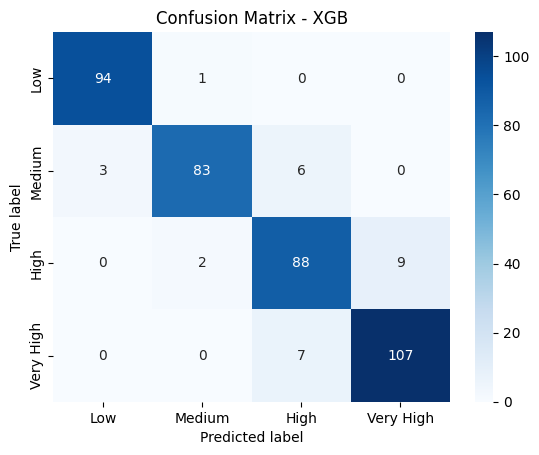

In [152]:
#confusion matrix for XGB
conf_matrix(model=model_xgb,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [153]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#Parameter grid for XGB
xgb_grid={
    'learning_rate':[0.05,0.25,0.30,0.35],
    'max_depth':[3,4,5,6],
    'min_child_weight':[1,4,5,6],
    'gamma':[0.0,0.1],
    'colsample_bytree':[0.7,0.8]

}
#Hyper parameter tuning using randomized search cv.
best_parameters_xgb,model_xgb_tuned,clf_report_xgb,tuned_xgb_scores=Hyper_parameter_tuning(grid_search=False,random_search=True,
                                                                          model_name=model_xgb,parameter_grid=xgb_grid,
                                                                          X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [154]:
#Printing best parameters for xgb
best_parameters_xgb[0]

,best_parameter,XGB Accuracy
min_child_weight,6.00,0.89
max_depth,6.00,0.89
learning_rate,0.30,0.89
gamma,0.10,0.89
colsample_bytree,0.80,0.89


In [155]:
#Storing model scores
model_scores=pd.concat([model_scores, tuned_xgb_scores], axis=0,join='inner')
model_scores

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.94,0.95,0.94,0.94
Tuned Logistic Regression,0.94,0.95,0.95,0.95
Auto ML Logistic Regression,0.95,0.95,0.95,0.95
KNN,0.77,0.78,0.77,0.77
Tuned KNN,0.78,0.79,0.78,0.78
Random Forest,0.90,0.90,0.90,0.90
Tuned Random Forest,0.89,0.89,0.90,0.89
XGB,0.93,0.93,0.93,0.93
Tuned XGB,0.89,0.92,0.92,0.92


In [156]:
#Printing classification report of tuned  XGB.
print(clf_report_xgb)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        95
           1       0.93      0.86      0.89        92
           2       0.84      0.88      0.86        99
           3       0.94      0.94      0.94       114

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



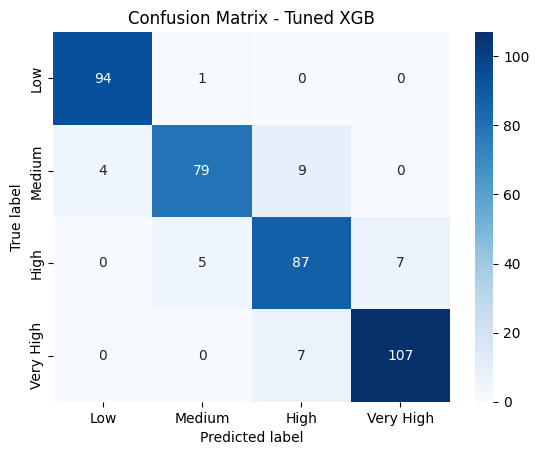

In [157]:
#Confusion matrix of tuned model XGB
conf_matrix(model={'Tuned XGB': model_xgb_tuned},X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

**ML Model - 5**

In [158]:
# ML Model - 5 Implementation

#creating instance of model storing it in dictionary
model_lgbm={'LGBM': lgb.LGBMClassifier()}

#fitting the model and creating classification report
model_lgbm,lgbm_score,lgbm_report=fit_and_score(model=model_lgbm,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1100
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 7
[LightGBM] [Info] Start training from score -1.373872
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.383797
[LightGBM] [Info] Start training from score -1.421922
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [159]:
#Storing model scores
model_scores=pd.concat([model_scores,lgbm_score], axis=0,join='inner')
model_scores

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.94,0.95,0.94,0.94
Tuned Logistic Regression,0.94,0.95,0.95,0.95
Auto ML Logistic Regression,0.95,0.95,0.95,0.95
KNN,0.77,0.78,0.77,0.77
Tuned KNN,0.78,0.79,0.78,0.78
Random Forest,0.90,0.90,0.90,0.90
Tuned Random Forest,0.89,0.89,0.90,0.89
XGB,0.93,0.93,0.93,0.93
Tuned XGB,0.89,0.92,0.92,0.92
LGBM,0.93,0.93,0.93,0.93


In [160]:
# Visualizing evaluation Metric Score chart

#Classification report for LGBM
print(lgbm_report['LGBM'])

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        95
           1       0.93      0.91      0.92        92
           2       0.86      0.89      0.88        99
           3       0.94      0.92      0.93       114

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



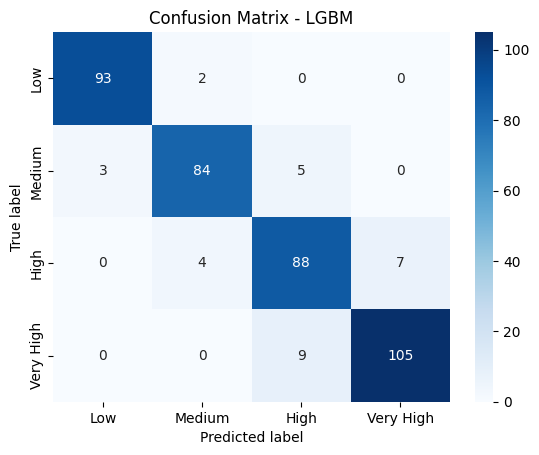

In [161]:
#confusion matrix for lgbm
conf_matrix(model=model_lgbm,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [162]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#Parameter grid for lgbm
lgbm_grid={'boosting_type': ['gbdt','rf','dart'],
           'objective': ['multiclass'],
           'metric': ['multi_error'],
           'num_class':[4],
           'bagging_fraction':[0.8],
           'bagging_freq':[10,20],
           'max_depth':[5,6,8,10,12,15],
           'num_leaves':[30,40,70],
           'learning_rate':[0.04,0.02,0.1]

    }

#Hyperparameter tuning using randomized search cv
best_parameters_lgbm,model_lgbm_tuned,clf_report_lgbm,tuned_lgbm_scores=Hyper_parameter_tuning(grid_search=False,random_search=True,
                                                                             model_name=model_lgbm,parameter_grid=lgbm_grid,
                                                                             X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1100
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 7
[LightGBM] [Info] Start training from score -1.373872
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.383797
[LightGBM] [Info] Start training from

In [163]:
#Storing model scores
model_scores=pd.concat([model_scores, tuned_lgbm_scores], axis=0,join='inner')
model_scores

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.94,0.95,0.94,0.94
Tuned Logistic Regression,0.94,0.95,0.95,0.95
Auto ML Logistic Regression,0.95,0.95,0.95,0.95
KNN,0.77,0.78,0.77,0.77
Tuned KNN,0.78,0.79,0.78,0.78
Random Forest,0.90,0.90,0.90,0.90
Tuned Random Forest,0.89,0.89,0.90,0.89
XGB,0.93,0.93,0.93,0.93
Tuned XGB,0.89,0.92,0.92,0.92
LGBM,0.93,0.93,0.93,0.93


In [164]:
#Printing best parameters for lgbm classifier
best_parameters_lgbm[0]

,best_parameter,LGBM Accuracy
objective,multiclass,0.90
num_leaves,70,0.90
num_class,4,0.90
metric,multi_error,0.90
max_depth,6,0.90
learning_rate,0.10,0.90
boosting_type,gbdt,0.90
bagging_freq,10,0.90
bagging_fraction,0.80,0.90


In [165]:
#Classification report for tuned lgbm
print(clf_report_lgbm)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97        95
           1       0.94      0.89      0.92        92
           2       0.86      0.90      0.88        99
           3       0.94      0.94      0.94       114

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


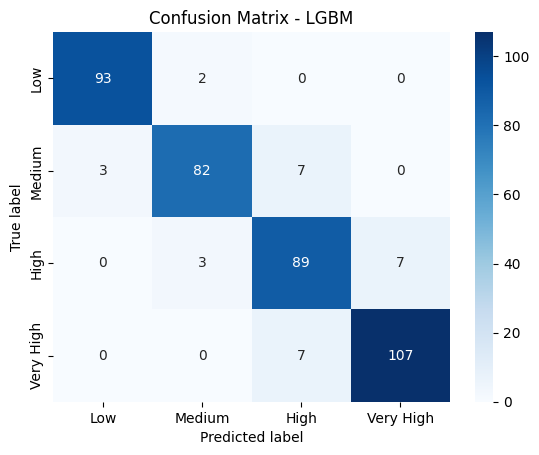

In [166]:
#Confusion matrix of tuned lgbm model
conf_matrix(model={'LGBM': model_lgbm_tuned},X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

ML Model - 6

In [167]:
# ML Model - 6 Implementation

#creating instance of model storing it in dictionary
model_cbc={'Cat Boost':CatBoostClassifier()}

#fitting the model and creating classification report
model_cbc,cbc_score,cbc_report=fit_and_score(model=model_cbc,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

Learning rate set to 0.081046
0:	learn: 1.2754570	total: 53.5ms	remaining: 53.4s
1:	learn: 1.1753916	total: 58.9ms	remaining: 29.4s
2:	learn: 1.1050659	total: 64.5ms	remaining: 21.4s
3:	learn: 1.0376885	total: 69.7ms	remaining: 17.4s
4:	learn: 0.9760201	total: 75.1ms	remaining: 14.9s
5:	learn: 0.9156027	total: 81.1ms	remaining: 13.4s
6:	learn: 0.8716445	total: 88.7ms	remaining: 12.6s
7:	learn: 0.8326714	total: 94.2ms	remaining: 11.7s
8:	learn: 0.7836465	total: 99.6ms	remaining: 11s
9:	learn: 0.7441121	total: 105ms	remaining: 10.4s
10:	learn: 0.7058173	total: 110ms	remaining: 9.92s
11:	learn: 0.6764249	total: 116ms	remaining: 9.53s
12:	learn: 0.6477643	total: 121ms	remaining: 9.2s
13:	learn: 0.6215122	total: 126ms	remaining: 8.9s
14:	learn: 0.5962523	total: 132ms	remaining: 8.65s
15:	learn: 0.5713689	total: 137ms	remaining: 8.44s
16:	learn: 0.5509252	total: 143ms	remaining: 8.25s
17:	learn: 0.5323714	total: 148ms	remaining: 8.07s
18:	learn: 0.5128926	total: 153ms	remaining: 7.92s
19:	le

In [168]:
#Storing model scores
model_scores=pd.concat([model_scores, cbc_score], axis=0,join='inner')
model_scores

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.94,0.95,0.94,0.94
Tuned Logistic Regression,0.94,0.95,0.95,0.95
Auto ML Logistic Regression,0.95,0.95,0.95,0.95
KNN,0.77,0.78,0.77,0.77
Tuned KNN,0.78,0.79,0.78,0.78
Random Forest,0.90,0.90,0.90,0.90
Tuned Random Forest,0.89,0.89,0.90,0.89
XGB,0.93,0.93,0.93,0.93
Tuned XGB,0.89,0.92,0.92,0.92
LGBM,0.93,0.93,0.93,0.93


In [169]:
# Visualizing evaluation Metric Score chart

#Classification report for catboost
print(cbc_report['Cat Boost'])

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.92      0.96      0.94        92
           2       0.92      0.90      0.91        99
           3       0.96      0.95      0.96       114

    accuracy                           0.94       400
   macro avg       0.94      0.95      0.94       400
weighted avg       0.95      0.94      0.94       400



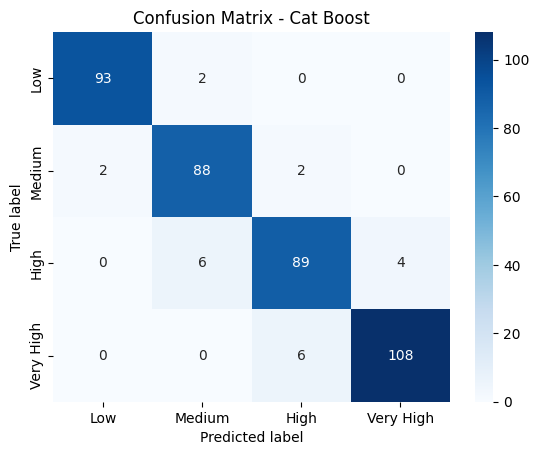

In [170]:
#Confusion matrix for cbc
conf_matrix(model=model_cbc,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [171]:
#Hyper parameter tuning using grid search cv.

#Parameters for catboost
cat_boost_grid = {'depth'         : [4,5,6,7,8,9, 10],
                 'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }

#hyperparameter tuning using randomized search cv
best_parameters_cbc,model_cbc_tuned,clf_report_cbc,tuned_cbc_score=Hyper_parameter_tuning(grid_search=False,random_search=True,
                                                                          model_name=model_cbc,parameter_grid=cat_boost_grid,
                                                                          X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0:	learn: 1.3623186	total: 95.6ms	remaining: 8.51s
1:	learn: 1.3399057	total: 171ms	remaining: 7.52s
2:	learn: 1.3242819	total: 265ms	remaining: 7.68s
3:	learn: 1.2999788	total: 330ms	remaining: 7.09s
4:	learn: 1.2810853	total: 392ms	remaining: 6.66s
5:	learn: 1.2570638	total: 454ms	remaining: 6.35s
6:	learn: 1.2332759	total: 515ms	remaining: 6.11s
7:	learn: 1.2127444	total: 579ms	remaining: 5.94s
8:	learn: 1.1953534	total: 644ms	remaining: 5.8s
9:	learn: 1.1752131	total: 705ms	remaining: 5.64s
10:	learn: 1.1573275	total: 771ms	remaining: 5.54s
11:	learn: 1.1424479	total: 918ms	remaining: 5.96s
12:	learn: 1.1268713	total: 1.05s	remaining: 6.2s
13:	learn: 1.1092892	total: 1.15s	remaining: 6.26s
14:	learn: 1.0941071	total: 1.31s	remaining: 6.55s
15:	learn: 1.0766776	total: 1.44s	remaining: 6.65s
16:	learn: 1.0613467	total: 1.55s	remaining: 6.65s
17:	learn: 1.0482057	total: 1.69s	remaining: 6.77s
18:	learn: 1.0333041	total: 1.75s

In [172]:
#Storing model scores
model_scores=pd.concat([model_scores, tuned_cbc_score], axis=0,join='inner')
model_scores

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.94,0.95,0.94,0.94
Tuned Logistic Regression,0.94,0.95,0.95,0.95
Auto ML Logistic Regression,0.95,0.95,0.95,0.95
KNN,0.77,0.78,0.77,0.77
Tuned KNN,0.78,0.79,0.78,0.78
Random Forest,0.90,0.90,0.90,0.90
Tuned Random Forest,0.89,0.89,0.90,0.89
XGB,0.93,0.93,0.93,0.93
Tuned XGB,0.89,0.92,0.92,0.92
LGBM,0.93,0.93,0.93,0.93


In [173]:
#Printing best parameters for CBC
best_parameters_cbc[0]

,best_parameter,Cat Boost Accuracy
learning_rate,0.02,0.89
iterations,90.00,0.89
depth,10.00,0.89


In [174]:
#Printing classification report for CBC
print(clf_report_cbc)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        95
           1       0.93      0.88      0.91        92
           2       0.87      0.89      0.88        99
           3       0.94      0.95      0.94       114

    accuracy                           0.93       400
   macro avg       0.93      0.92      0.92       400
weighted avg       0.93      0.93      0.92       400



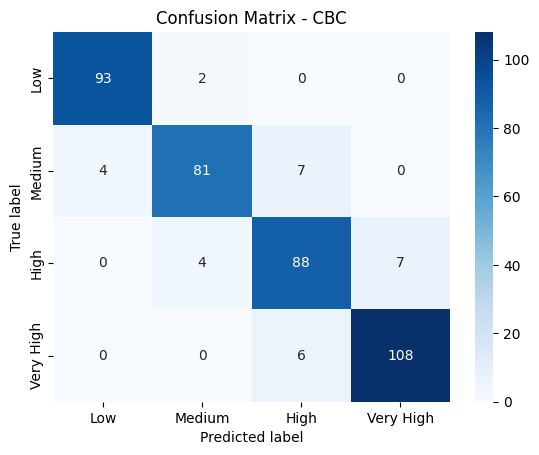

In [175]:
#Confusion matrix of tuned CBC model
conf_matrix(model={'CBC': model_cbc_tuned},X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

**ML Model - 7**

In [176]:
#Implementing SVM
model_svm={'SVM': svm.SVC()}
model_svm,svm_score,svm_report=fit_and_score(model=model_svm,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [177]:
#Storing model scores
model_scores=pd.concat([model_scores, svm_score], axis=0,join='inner')
model_scores

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.94,0.95,0.94,0.94
Tuned Logistic Regression,0.94,0.95,0.95,0.95
Auto ML Logistic Regression,0.95,0.95,0.95,0.95
KNN,0.77,0.78,0.77,0.77
Tuned KNN,0.78,0.79,0.78,0.78
Random Forest,0.90,0.90,0.90,0.90
Tuned Random Forest,0.89,0.89,0.90,0.89
XGB,0.93,0.93,0.93,0.93
Tuned XGB,0.89,0.92,0.92,0.92
LGBM,0.93,0.93,0.93,0.93


In [178]:
#Printing classification report for SVM
print(svm_report['SVM'])

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        95
           1       0.90      0.89      0.90        92
           2       0.86      0.88      0.87        99
           3       0.96      0.93      0.95       114

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



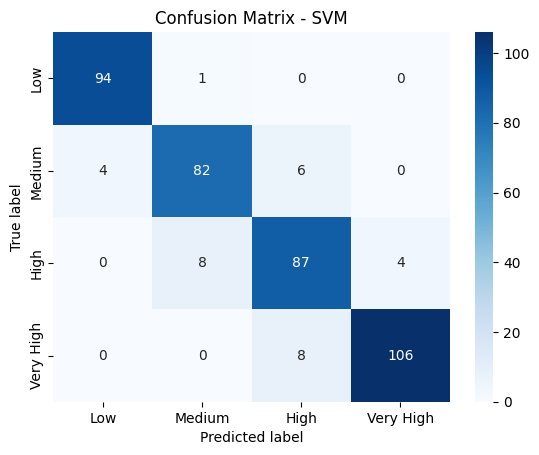

In [179]:
#Confusion matrix for SVM
conf_matrix(model=model_svm,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [180]:
#Hyperparameter tuning for SVM
svm_grid = {'C': range(70,80,1),
              'gamma': [0.01,0.05,0.1,0.2],
              'kernel': ['linear','rbf','poly','sigmoid']}

best_parameters_svm,model_svm_tuned,clf_report_svm,tuned_svm_score=Hyper_parameter_tuning(grid_search=True,random_search=False,model_name=model_svm,parameter_grid=svm_grid,X_train=X_train,X_test=X_test,
                                                           y_train=y_train,y_test=y_test)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


In [181]:
#Storing model scores
model_scores=pd.concat([model_scores, tuned_svm_score], axis=0,join='inner')
model_scores

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.94,0.95,0.94,0.94
Tuned Logistic Regression,0.94,0.95,0.95,0.95
Auto ML Logistic Regression,0.95,0.95,0.95,0.95
KNN,0.77,0.78,0.77,0.77
Tuned KNN,0.78,0.79,0.78,0.78
Random Forest,0.90,0.90,0.90,0.90
Tuned Random Forest,0.89,0.89,0.90,0.89
XGB,0.93,0.93,0.93,0.93
Tuned XGB,0.89,0.92,0.92,0.92
LGBM,0.93,0.93,0.93,0.93


In [182]:
#best parameters for svm
best_parameters_svm[0]

,best_parameter,SVM Accuracy
C,76,0.94
gamma,0.01,0.94
kernel,linear,0.94


In [183]:
#Classification report for tuned svm
print(clf_report_svm)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        95
           1       0.93      0.97      0.95        92
           2       0.95      0.89      0.92        99
           3       0.95      0.97      0.96       114

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



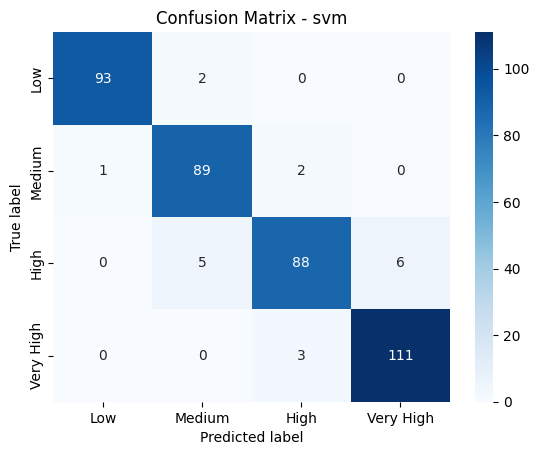

In [184]:
#Confusion matrix of tuned model
conf_matrix(model={'svm': model_svm_tuned},X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [185]:
#model accuracy scores
model_scores

,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.94,0.95,0.94,0.94
Tuned Logistic Regression,0.94,0.95,0.95,0.95
Auto ML Logistic Regression,0.95,0.95,0.95,0.95
KNN,0.77,0.78,0.77,0.77
Tuned KNN,0.78,0.79,0.78,0.78
Random Forest,0.90,0.90,0.90,0.90
Tuned Random Forest,0.89,0.89,0.90,0.89
XGB,0.93,0.93,0.93,0.93
Tuned XGB,0.89,0.92,0.92,0.92
LGBM,0.93,0.93,0.93,0.93


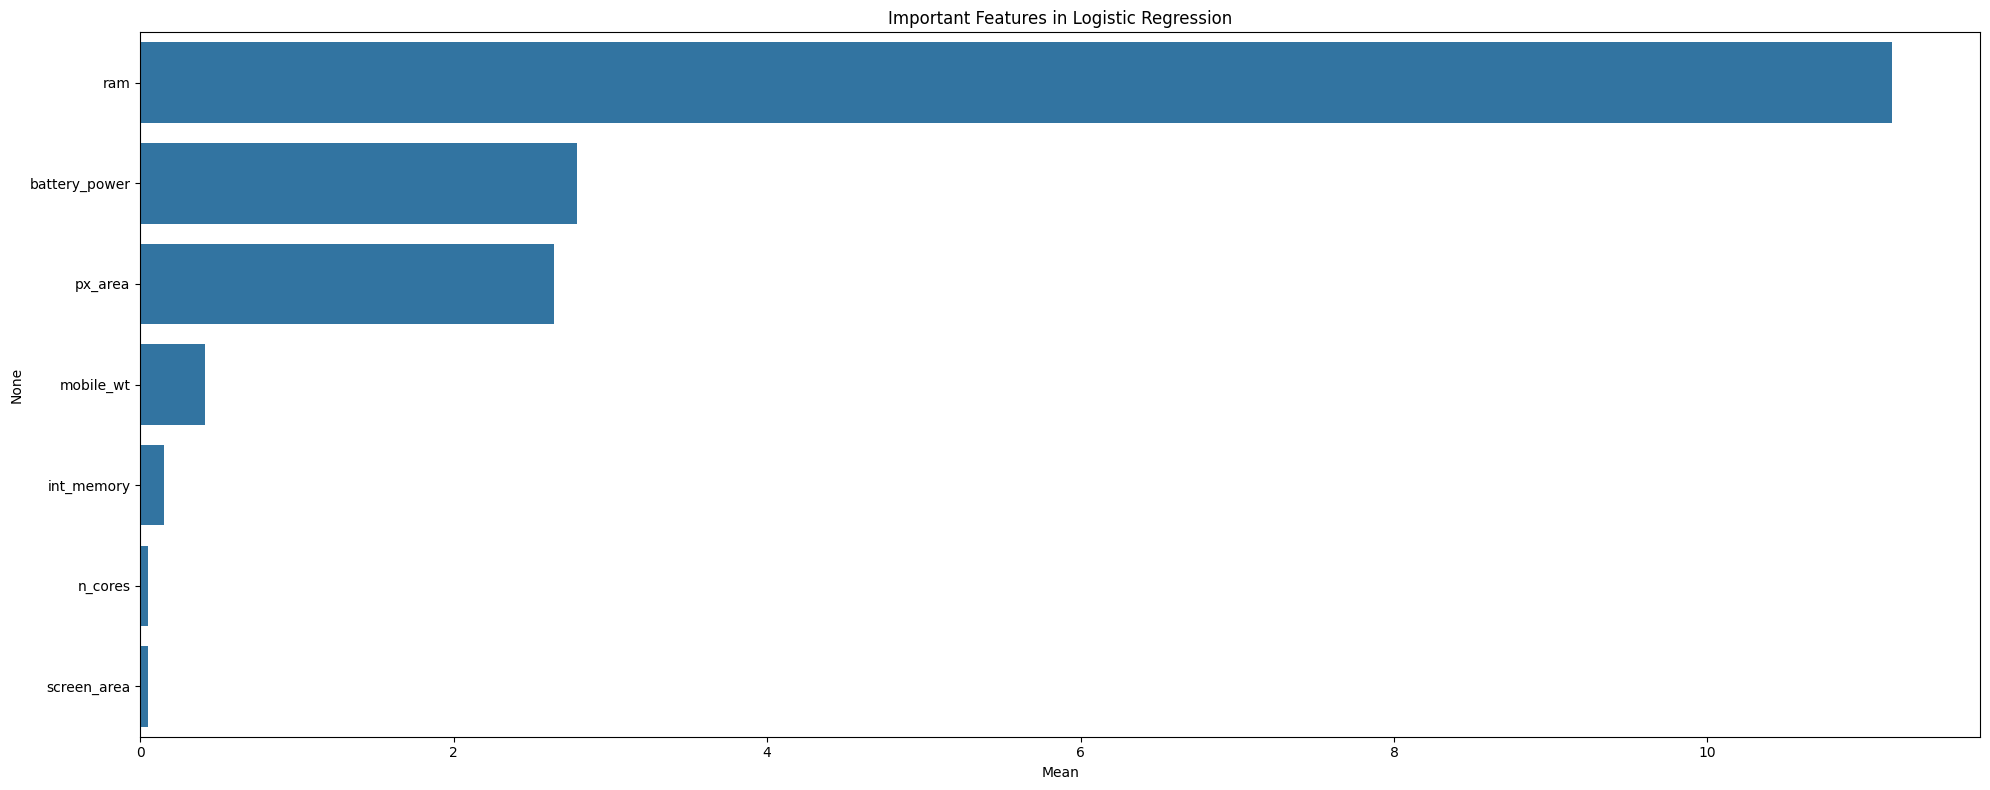

In [186]:
#Plotting important features of LR
plt.figure(figsize=(20, 8))
sns.barplot(y=imp_features.index, x="Mean", data=imp_features)
plt.title('Important Features in Logistic Regression')
plt.tight_layout()
plt.show()

# **Future Work (Optional)**

In [187]:
# Saving the File using pickle
filename = 'mobile_price_predict.sav'
pickle.dump(lr_automl['Auto ML Logistic Regression'], open(filename, 'wb'))

In [188]:
# Load the File and predict unseen data.
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model_score= loaded_model.score(X_test, y_test)
print(loaded_model_score)

0.95


Testing the code

In [193]:
# Example mobile specs
# sample_data = {
#     'battery_power': 1200,
#     'blue': 1,
#     'clock_speed': 2.0,
#     'dual_sim': 1,
#     'fc': 5,
#     'four_g': 1,
#     'int_memory': 32,
#     'm_dep': 0.5,
#     'mobile_wt': 150,
#     'n_cores': 4,
#     'pc': 8,
#     'px_height': 600,
#     'px_width': 800,
#     'ram': 3000,
#     'sc_h': 12,
#     'sc_w': 7,
#     'talk_time': 15,
#     'three_g': 1,
#     'touch_screen': 1,
#     'wifi': 1
# }

# Create an empty dictionary
sample_data = {}

# Take input from the user for each feature
sample_data['battery_power'] = int(input("Enter battery power (mAh): "))
sample_data['blue'] = int(input("Bluetooth supported? (1: Yes, 0: No): "))
sample_data['clock_speed'] = float(input("Enter clock speed (GHz): "))
sample_data['dual_sim'] = int(input("Dual SIM supported? (1: Yes, 0: No): "))
sample_data['fc'] = int(input("Front camera megapixels: "))
sample_data['four_g'] = int(input("4G supported? (1: Yes, 0: No): "))
sample_data['int_memory'] = int(input("Internal memory (GB): "))
sample_data['m_dep'] = float(input("Mobile depth (cm): "))
sample_data['mobile_wt'] = int(input("Mobile weight (grams): "))
sample_data['n_cores'] = int(input("Number of cores: "))
sample_data['pc'] = int(input("Primary camera megapixels: "))
sample_data['px_height'] = int(input("Pixel height: "))
sample_data['px_width'] = int(input("Pixel width: "))
sample_data['ram'] = int(input("RAM (MB): "))
sample_data['sc_h'] = int(input("Screen height (cm): "))
sample_data['sc_w'] = int(input("Screen width (cm): "))
sample_data['talk_time'] = int(input("Talk time (hours): "))
sample_data['three_g'] = int(input("3G supported? (1: Yes, 0: No): "))
sample_data['touch_screen'] = int(input("Touch screen? (1: Yes, 0: No): "))
sample_data['wifi'] = int(input("WiFi supported? (1: Yes, 0: No): "))

# Convert to DataFrame
import pandas as pd
sample_df = pd.DataFrame([sample_data])

# Create the new features 'screen_area' and 'px_area'
sample_df['screen_area'] = sample_df['sc_h'] * sample_df['sc_w']
sample_df['px_area'] = sample_df['px_height'] * sample_df['px_width']

# Select only the features used for training
selected_features = ['screen_area', 'n_cores', 'int_memory', 'mobile_wt', 'px_area', 'battery_power', 'ram']
sample_df = sample_df[selected_features]

# Apply the same transformations and scaling as the training data
from sklearn import preprocessing
pt=preprocessing.PowerTransformer(copy=False)
X_copy = X.copy()
pt.fit(X_copy[['screen_area','px_area']])
sample_df[['screen_area','px_area']] = pt.transform(sample_df[['screen_area','px_area']])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
sample_df_scaled = scaler.transform(sample_df)
sample_df_scaled_df = pd.DataFrame(data=sample_df_scaled, columns=selected_features)

# Predict using your trained model
predicted = loaded_model.predict(sample_df_scaled_df)
print("Predicted Price Range:", predicted[0])

Enter battery power (mAh): 5000
Bluetooth supported? (1: Yes, 0: No): 1
Enter clock speed (GHz): 2.0
Dual SIM supported? (1: Yes, 0: No): 1
Front camera megapixels: 50
4G supported? (1: Yes, 0: No): 1
Internal memory (GB): 64
Mobile depth (cm): 1.5
Mobile weight (grams): 150
Number of cores: 5
Primary camera megapixels: 25
Pixel height: 800
Pixel width: 600
RAM (MB): 3000
Screen height (cm): 7
Screen width (cm): 5
Talk time (hours): 15
3G supported? (1: Yes, 0: No): 1
Touch screen? (1: Yes, 0: No): 1
WiFi supported? (1: Yes, 0: No): 1
Predicted Price Range: 3
